In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import string
import os
from nltk.util import ngrams
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearnex import patch_sklearn 
patch_sklearn()

# to make this notebook's output stable across runs
np.random.seed(42)

# to plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# for statistical data visualization
import seaborn as sns 

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Intel(R) oneAPI Data Analytics Library solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


# EXPLORATORY DATA ANALYSIS AND PREPROCESSING

In [2]:
# loading the datset containing deatils about movies
mov_det = pd.read_csv('MoviesDetails.csv')
mov_det

C:\Users\cathe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
0,2,0,Drama|Crime,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,...,69.0,suomi,Released,NaN,Ariel,7.1,40.0,2.0,1.0,2.0
1,3,0,Drama|Comedy,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.47445,Villealfa Filmproduction Oy,Finland,...,76.0,English,Released,NaN,Shadows in Paradise,7.0,32.0,1.0,1.0,3.0
2,5,4000000,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,...,98.0,English,Released,Twelve outrageous guests. Four scandalous requ...,NaN,6.5,485.0,2.0,1.0,1.0
3,6,0,Action|Thriller|Crime,tt0107286,en,Judgment Night,"""While racing to a boxing match, Frank, Mike, ...",1.32287,Universal Pictures,Japan,...,110.0,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69.0,3.0,2.0,1.0
4,8,42000,Documentary,tt0825671,en,Life in Loops (A Megacities RMX),"""Timo Novotny labels his new project an experi...",0.054716,inLoops,Austria,...,80.0,English,Released,A Megacities remix.,Life in Loops (A Megacities RMX),6.4,4.0,1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324080,469215,0,Documentary|History|TV Movie,tt5430190,en,The Day Hitler Died,The story of Hitler’s final hours told by peop...,0.0045,History Channel,United States of America,...,46.0,Deutsch,Released,"April 30th, 1945",The Day Hitler Died,7.0,1.0,1.0,1.0,2.0
324081,469216,0,NaN,NaN,de,Mobb Deep - Life of the Infamous: The Videos,NaN,0.00045,Sony Music Entertainmant,United States of America,...,NaN,English,Released,NaN,Mobb Deep - Life of the Infamous: The Videos,9.0,1.0,1.0,1.0,1.0
324082,469217,0,Drama|Comedy,NaN,en,#idiot,"In the modern day pursuit of fame and fortune,...",1.37217,none,Malaysia,...,11.0,English,Released,NaN,#idiot,0.0,0.0,0.0,1.0,1.0
324083,469218,0,Drama|Comedy,tt6391664,en,Conspiracy P.I.E,Director Levi A. Taylor invites you on a nosta...,0.0096,none,United States of America,...,12.0,English,Released,NaN,Conspiracy P.I.E,0.0,0.0,0.0,1.0,1.0


In [3]:
# loading the datset containing deatils about movie cast and crew
mov_cast = pd.read_csv('AllMoviesCastingRaw.csv')
mov_cast

,id,actor1_name,actor1_gender,actor2_name,actor2_gender,actor3_name,actor3_gender,actor4_name,actor4_gender,actor5_name,actor5_gender,actor_number,director_name,director_gender,director_number,producer_name,producer_number,screeplay_name,editor_name
0,2,Turo Pajala,0,Susanna Haavisto,0.0,Matti Pellonpää,2,Eetu Hilkamo,0,none,0,4,Aki Kaurismäki,0.0,1,none,0,Aki Kaurismäki,Raija Talvio
1,3,Matti Pellonpää,2,Kati Outinen,1.0,Sakari Kuosmanen,2,Esko Nikkari,2,Kylli Köngäs,0,7,Aki Kaurismäki,0.0,1,Mika Kaurismäki,1,Aki Kaurismäki,Raija Talvio
2,5,Tim Roth,2,Antonio Banderas,2.0,Jennifer Beals,1,Madonna,1,Marisa Tomei,1,24,Allison Anders,1.0,4,Lawrence Bender,1,none,Margaret Goodspeed
3,6,Emilio Estevez,2,Cuba Gooding Jr.,2.0,Denis Leary,2,Jeremy Piven,2,Peter Greene,2,15,Stephen Hopkins,2.0,1,Gene Levy,1,Lewis Colick,Tim Wellburn
4,8,none,0,none,0.0,none,0,none,0,none,0,0,Timo Novotny,0.0,1,Timo Novotny,2,Michael Glawogger,Timo Novotny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328988,469215,none,0,Mark Strong,2.0,Traudl Junge,0,Adolf Hitler,2,Michael A. Musmanno,0,5,Craig Collinson,0.0,1,none,0,none,none
328989,469216,none,0,none,0.0,none,0,none,0,none,0,0,none,1.0,0,none,0,none,none
328990,469217,none,0,Garrye,0.0,Kenny Gan,0,Amanda Ng,0,Michael Chen,0,4,Adrian Lai,0.0,1,none,0,Adrian Lai,none
328991,469218,none,0,Evan Silcox,0.0,Zane Penny,0,Rebecca Barker,0,Richie Goldstein,0,6,Levi A. Taylor,0.0,1,none,0,Levi A. Taylor,none


In [4]:
# removing unimportant columns from the movie details dataset
mov_det_new = mov_det.drop(["imdb_id","original_title","overview","production_companies","spoken_languages","status",
                            "tagline",'title',"production_companies_number","production_countries_number",
                            "spoken_languages_number"], axis=1) 
mov_det_new

,id,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count
0,2,0,Drama|Crime,fi,0.823904,Finland,21/10/1988,0.0,69.0,7.1,40.0
1,3,0,Drama|Comedy,fi,0.47445,Finland,16/10/1986,0.0,76.0,7.0,32.0
2,5,4000000,Crime|Comedy,en,1.698,United States of America,25/12/1995,4300000.0,98.0,6.5,485.0
3,6,0,Action|Thriller|Crime,en,1.32287,Japan,15/10/1993,12136938.0,110.0,6.5,69.0
4,8,42000,Documentary,en,0.054716,Austria,01/01/2006,0.0,80.0,6.4,4.0
...,...,...,...,...,...,...,...,...,...,...,...
324080,469215,0,Documentary|History|TV Movie,en,0.0045,United States of America,21/01/2016,0.0,46.0,7.0,1.0
324081,469216,0,NaN,de,0.00045,United States of America,24/11/2006,0.0,NaN,9.0,1.0
324082,469217,0,Drama|Comedy,en,1.37217,Malaysia,02/08/2017,0.0,11.0,0.0,0.0
324083,469218,0,Drama|Comedy,en,0.0096,United States of America,10/11/2016,0.0,12.0,0.0,0.0


In [5]:
# removing unimportant columns from the cast and crew details dataset
mov_cast_new = mov_cast.drop(["actor_number","director_number","producer_number"], axis=1) 
mov_cast_new

,id,actor1_name,actor1_gender,actor2_name,actor2_gender,actor3_name,actor3_gender,actor4_name,actor4_gender,actor5_name,actor5_gender,director_name,director_gender,producer_name,screeplay_name,editor_name
0,2,Turo Pajala,0,Susanna Haavisto,0.0,Matti Pellonpää,2,Eetu Hilkamo,0,none,0,Aki Kaurismäki,0.0,none,Aki Kaurismäki,Raija Talvio
1,3,Matti Pellonpää,2,Kati Outinen,1.0,Sakari Kuosmanen,2,Esko Nikkari,2,Kylli Köngäs,0,Aki Kaurismäki,0.0,Mika Kaurismäki,Aki Kaurismäki,Raija Talvio
2,5,Tim Roth,2,Antonio Banderas,2.0,Jennifer Beals,1,Madonna,1,Marisa Tomei,1,Allison Anders,1.0,Lawrence Bender,none,Margaret Goodspeed
3,6,Emilio Estevez,2,Cuba Gooding Jr.,2.0,Denis Leary,2,Jeremy Piven,2,Peter Greene,2,Stephen Hopkins,2.0,Gene Levy,Lewis Colick,Tim Wellburn
4,8,none,0,none,0.0,none,0,none,0,none,0,Timo Novotny,0.0,Timo Novotny,Michael Glawogger,Timo Novotny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328988,469215,none,0,Mark Strong,2.0,Traudl Junge,0,Adolf Hitler,2,Michael A. Musmanno,0,Craig Collinson,0.0,none,none,none
328989,469216,none,0,none,0.0,none,0,none,0,none,0,none,1.0,none,none,none
328990,469217,none,0,Garrye,0.0,Kenny Gan,0,Amanda Ng,0,Michael Chen,0,Adrian Lai,0.0,none,Adrian Lai,none
328991,469218,none,0,Evan Silcox,0.0,Zane Penny,0,Rebecca Barker,0,Richie Goldstein,0,Levi A. Taylor,0.0,none,Levi A. Taylor,none


In [6]:
# filtering out the Hollywood movies from MoviesDetails.csv
holly_movies = mov_det_new.loc[(mov_det_new['original_language'] == 'en') & 
                               (mov_det_new['production_countries'] == 'United States of America')]
holly_movies 

,id,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count
2,5,4000000,Crime|Comedy,en,1.698,United States of America,25/12/1995,4300000.0,98.0,6.5,485.0
6,11,11000000,Adventure|Action|Science Fiction,en,10.492614,United States of America,25/05/1977,775398007.0,121.0,8.0,6168.0
7,12,94000000,Animation|Family,en,9.915573,United States of America,30/05/2003,940335536.0,100.0,7.6,5531.0
8,13,55000000,Comedy|Drama|Romance,en,10.351236,United States of America,06/07/1994,677945399.0,142.0,8.2,7204.0
9,14,15000000,Drama,en,8.191009,United States of America,15/09/1999,356296601.0,122.0,7.9,2994.0
...,...,...,...,...,...,...,...,...,...,...,...
324055,469189,0,Fantasy|Comedy|Animation|Family,en,0.15,United States of America,NaN,0.0,0.0,0.0,0.0
324058,469192,0,Western,en,2.16707,United States of America,02/08/2017,0.0,16.0,10.0,1.0
324080,469215,0,Documentary|History|TV Movie,en,0.0045,United States of America,21/01/2016,0.0,46.0,7.0,1.0
324083,469218,0,Drama|Comedy,en,0.0096,United States of America,10/11/2016,0.0,12.0,0.0,0.0


In [7]:
# filtering out the Bollywood movies from MoviesDetails.csv
bolly_movies = mov_det_new.loc[(mov_det_new['original_language'] == 'hi') & 
                               (mov_det_new['production_countries'] == 'India')]
bolly_movies

,id,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count
377,480,1200000,Comedy|Drama|Romance,hi,0.876148,India,30/08/2001,30787356.0,114.0,6.8,51.0
758,917,77764,Drama,hi,0.286263,India,13/02/1957,1036849.0,172.0,6.5,9.0
2475,4251,7000000,Drama|Romance,hi,0.300848,India,12/11/2004,29385320.0,192.0,7.4,60.0
2477,4253,1101652,Drama|Comedy|Romance|Family|Foreign,hi,0.021427,India,28/05/2004,5525109.0,142.0,6.0,20.0
2478,4254,3947601,Comedy|Drama,hi,0.833918,India,27/11/2003,13200241.0,186.0,7.2,97.0
...,...,...,...,...,...,...,...,...,...,...,...
321324,465958,0,Drama,hi,0.0001,India,01/07/1992,0.0,156.0,0.0,0.0
322399,467252,0,Drama,hi,0.00434,India,15/01/1940,0.0,119.0,0.0,0.0
322594,467485,0,Drama,hi,0.035498,India,03/02/2017,0.0,120.0,0.0,0.0
323573,468624,0,Horror,hi,0.083,India,29/07/1980,0.0,126.0,0.0,0.0


In [8]:
# merging the Hollywood movie details with the AllMoviesCastingRaw.csv based on the common column 'id'
hollywood = pd.merge(holly_movies, mov_cast_new, on='id', how='inner')
hollywood

,id,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,vote_average,...,actor3_gender,actor4_name,actor4_gender,actor5_name,actor5_gender,director_name,director_gender,producer_name,screeplay_name,editor_name
0,5,4000000,Crime|Comedy,en,1.698,United States of America,25/12/1995,4300000.0,98.0,6.5,...,1,Madonna,1,Marisa Tomei,1,Allison Anders,1.0,Lawrence Bender,none,Margaret Goodspeed
1,11,11000000,Adventure|Action|Science Fiction,en,10.492614,United States of America,25/05/1977,775398007.0,121.0,8.0,...,1,Peter Cushing,2,Alec Guinness,2,George Lucas,2.0,Gary Kurtz,none,Marcia Lucas
2,12,94000000,Animation|Family,en,9.915573,United States of America,30/05/2003,940335536.0,100.0,7.6,...,2,Willem Dafoe,2,Brad Garrett,2,Andrew Stanton,2.0,Graham Walters,Andrew Stanton,David Ian Salter
3,13,55000000,Comedy|Drama|Romance,en,10.351236,United States of America,06/07/1994,677945399.0,142.0,8.2,...,2,Mykelti Williamson,2,Sally Field,1,Robert Zemeckis,2.0,Wendy Finerman,Eric Roth,Arthur Schmidt
4,14,15000000,Drama,en,8.191009,United States of America,15/09/1999,356296601.0,122.0,7.9,...,1,Wes Bentley,2,Mena Suvari,1,Sam Mendes,2.0,Bruce Cohen,Alan Ball,Christopher Greenbury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47603,469189,0,Fantasy|Comedy|Animation|Family,en,0.15,United States of America,NaN,0.0,0.0,0.0,...,0,none,0,none,0,none,1.0,Damon Ross,none,none
47604,469192,0,Western,en,2.16707,United States of America,02/08/2017,0.0,16.0,10.0,...,1,Annalise Basso,1,Dana Gourrier,0,Courtney Hoffman,1.0,Jordana Mollick,Courtney Hoffman,Julie Garces
47605,469215,0,Documentary|History|TV Movie,en,0.0045,United States of America,21/01/2016,0.0,46.0,7.0,...,0,Adolf Hitler,2,Michael A. Musmanno,0,Craig Collinson,0.0,none,none,none
47606,469218,0,Drama|Comedy,en,0.0096,United States of America,10/11/2016,0.0,12.0,0.0,...,0,Rebecca Barker,0,Richie Goldstein,0,Levi A. Taylor,0.0,none,Levi A. Taylor,none


In [9]:
# merging the Bollywood movie details with the AllMoviesCastingRaw.csv based on the common column 'id'
bollywood = pd.merge(bolly_movies, mov_cast_new, on='id', how='inner')
bollywood

,id,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,vote_average,...,actor3_gender,actor4_name,actor4_gender,actor5_name,actor5_gender,director_name,director_gender,producer_name,screeplay_name,editor_name
0,480,1200000,Comedy|Drama|Romance,hi,0.876148,India,30/08/2001,30787356.0,114.0,6.8,...,0,Vijay Raaz,2,Tillotama Shome,0,Mira Nair,1.0,Caroline Baron,Sabrina Dhawan,Allyson C. Johnson
1,917,77764,Drama,hi,0.286263,India,13/02/1957,1036849.0,172.0,6.5,...,2,Raaj Kumar,2,Kanhaiyalal,2,Mehboob Khan,2.0,Mehboob Khan,none,Shamsudin Kadri
2,4251,7000000,Drama|Romance,hi,0.300848,India,12/11/2004,29385320.0,192.0,7.4,...,0,Amitabh Bachchan,2,Hema Malini,1,Yash Chopra,2.0,Yash Chopra,Aditya Chopra,Ritesh Soni
3,4253,1101652,Drama|Comedy|Romance|Family|Foreign,hi,0.021427,India,28/05/2004,5525109.0,142.0,6.0,...,1,Rati Agnihotri,1,Rishi Kapoor,2,Kunal Kohli,0.0,Yash Chopra,Kunal Kohli,Ritesh Soni
4,4254,3947601,Comedy|Drama,hi,0.833918,India,27/11/2003,13200241.0,186.0,7.2,...,2,Jaya Bachchan,1,Sonali Bendre,1,Nikhil Advani,0.0,Karan Johar,Karan Johar,Sanjay Sankla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,465958,0,Drama,hi,0.0001,India,01/07/1992,0.0,156.0,0.0,...,1,Sudhir Dalvi,0,Govinda,2,Kirti Kumar,0.0,Kirti Kumar,none,none
663,467252,0,Drama,hi,0.00434,India,15/01/1940,0.0,119.0,0.0,...,0,Hansa Wadkar,0,Rama Shukul,0,N.R. Acharya,0.0,none,none,none
664,467485,0,Drama,hi,0.035498,India,03/02/2017,0.0,120.0,0.0,...,0,Bhavna Pani,0,Pawan Tiwari,0,Zaigham Imam,0.0,Pawan Tiwari,none,Prakash Jha
665,468624,0,Horror,hi,0.083,India,29/07/1980,0.0,126.0,0.0,...,0,Madhu Kapoor,0,Mac Mohan,2,Shyam Ramsay,0.0,Keshu Ramsay,none,none


In [10]:
# information about the Hollywood dataframe
hollywood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47608 entries, 0 to 47607
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    47608 non-null  int64  
 1   budget                47608 non-null  int64  
 2   genres                47608 non-null  object 
 3   original_language     47608 non-null  object 
 4   popularity            47608 non-null  object 
 5   production_countries  47608 non-null  object 
 6   release_date          46977 non-null  object 
 7   revenue               47608 non-null  float64
 8   runtime               47476 non-null  float64
 9   vote_average          47608 non-null  float64
 10  vote_count            47608 non-null  float64
 11  actor1_name           47608 non-null  object 
 12  actor1_gender         47608 non-null  int64  
 13  actor2_name           47608 non-null  object 
 14  actor2_gender         47608 non-null  float64
 15  actor3_name        

In [11]:
# information about the Bollywood dataframe
bollywood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 667 entries, 0 to 666
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    667 non-null    int64  
 1   budget                667 non-null    int64  
 2   genres                667 non-null    object 
 3   original_language     667 non-null    object 
 4   popularity            667 non-null    object 
 5   production_countries  667 non-null    object 
 6   release_date          667 non-null    object 
 7   revenue               667 non-null    float64
 8   runtime               667 non-null    float64
 9   vote_average          667 non-null    float64
 10  vote_count            667 non-null    float64
 11  actor1_name           667 non-null    object 
 12  actor1_gender         667 non-null    int64  
 13  actor2_name           667 non-null    object 
 14  actor2_gender         667 non-null    float64
 15  actor3_name           6

In [12]:
# statistical information about the Hollywood dataframe
hollywood.describe()

,id,budget,revenue,runtime,vote_average,vote_count,actor1_gender,actor2_gender,actor3_gender,actor4_gender,actor5_gender,director_gender
count,47608.000000,4.760800e+04,4.760800e+04,47476.000000,47608.000000,47608.000000,47608.000000,47608.000000,47608.000000,47608.000000,47608.000000,47608.000000
mean,187069.495232,2.650031e+06,7.343941e+06,74.438053,3.638002,59.220215,0.846454,1.001785,0.925160,0.867648,0.817804,1.141153
std,146431.090436,1.426773e+07,5.288923e+07,54.039988,3.040803,346.452575,0.916076,0.864564,0.881615,0.893293,0.900116,0.942855
min,5.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45605.750000,0.000000e+00,0.000000e+00,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,160203.500000,0.000000e+00,0.000000e+00,84.000000,4.700000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000
75%,315822.250000,0.000000e+00,0.000000e+00,96.000000,6.100000,8.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,469219.000000,4.000000e+08,2.781506e+09,5220.000000,10.000000,11100.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [13]:
# statistical information about the Bollywood dataframe
bollywood.describe()

,id,budget,revenue,runtime,vote_average,vote_count,actor1_gender,actor2_gender,actor3_gender,actor4_gender,actor5_gender,director_gender
count,667.000000,6.670000e+02,6.670000e+02,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,220244.170915,2.362894e+06,6.344310e+06,142.374813,4.707496,14.583208,0.947526,1.101949,0.883058,0.817091,0.697151,0.806597
std,160258.731554,4.854846e+06,1.501291e+07,24.847955,2.850795,28.323690,0.962638,0.832042,0.839060,0.888435,0.874071,0.960208
min,480.000000,0.000000e+00,0.000000e+00,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46411.000000,0.000000e+00,0.000000e+00,127.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,241882.000000,4.000000e+05,7.471460e+05,141.000000,5.700000,6.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,372386.500000,3.000000e+06,6.541216e+06,157.000000,6.800000,17.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,468652.000000,7.500000e+07,1.800000e+08,320.000000,10.000000,437.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


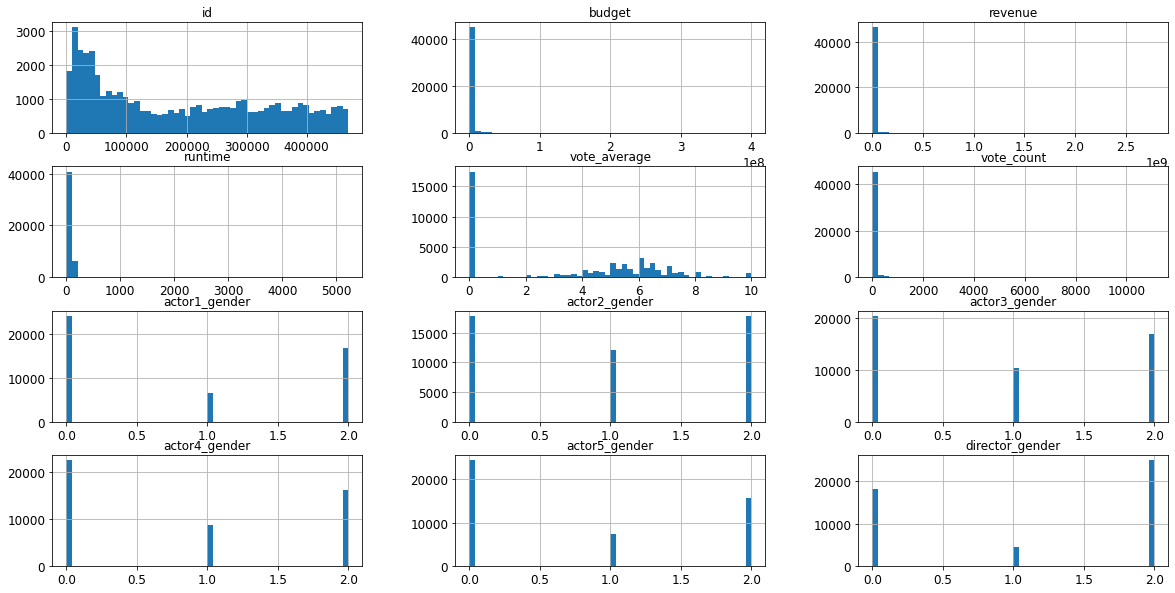

In [14]:
# Histograms for the attributes in Hollywood dataframe
hollywood.hist(bins=50, figsize=(20,10))
plt.show()

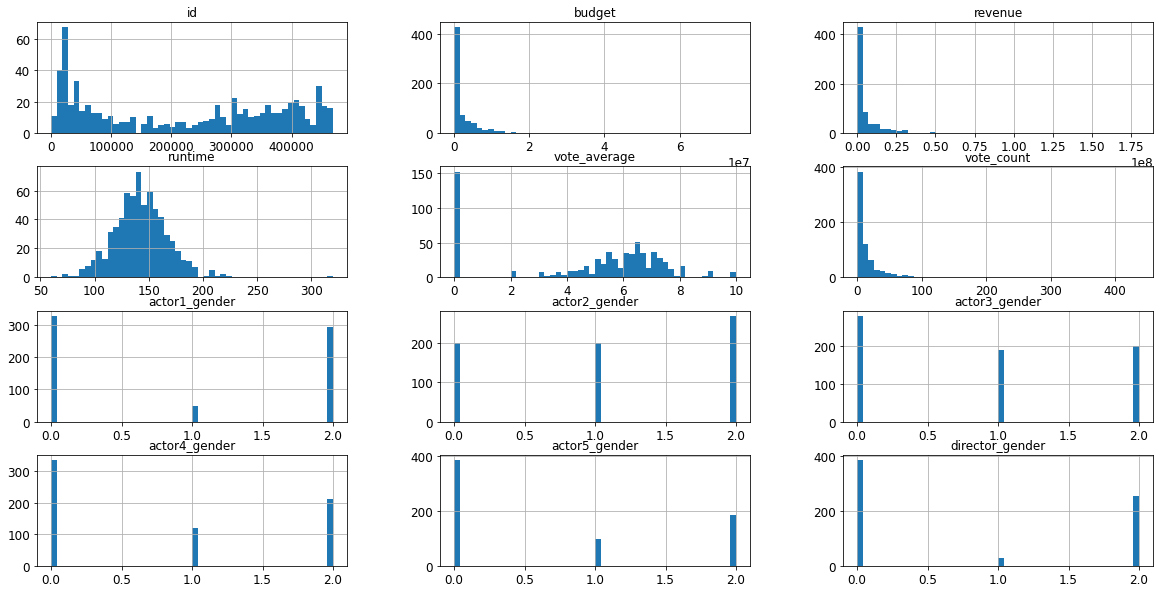

In [15]:
# Histograms for the attributes in Bollywood dataframe
bollywood.hist(bins=50, figsize=(20,10))
plt.show()

In [16]:
# removing NaN values in Hollywood dataframe
hollywood = hollywood.dropna()
hollywood

,id,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,vote_average,...,actor3_gender,actor4_name,actor4_gender,actor5_name,actor5_gender,director_name,director_gender,producer_name,screeplay_name,editor_name
0,5,4000000,Crime|Comedy,en,1.698,United States of America,25/12/1995,4300000.0,98.0,6.5,...,1,Madonna,1,Marisa Tomei,1,Allison Anders,1.0,Lawrence Bender,none,Margaret Goodspeed
1,11,11000000,Adventure|Action|Science Fiction,en,10.492614,United States of America,25/05/1977,775398007.0,121.0,8.0,...,1,Peter Cushing,2,Alec Guinness,2,George Lucas,2.0,Gary Kurtz,none,Marcia Lucas
2,12,94000000,Animation|Family,en,9.915573,United States of America,30/05/2003,940335536.0,100.0,7.6,...,2,Willem Dafoe,2,Brad Garrett,2,Andrew Stanton,2.0,Graham Walters,Andrew Stanton,David Ian Salter
3,13,55000000,Comedy|Drama|Romance,en,10.351236,United States of America,06/07/1994,677945399.0,142.0,8.2,...,2,Mykelti Williamson,2,Sally Field,1,Robert Zemeckis,2.0,Wendy Finerman,Eric Roth,Arthur Schmidt
4,14,15000000,Drama,en,8.191009,United States of America,15/09/1999,356296601.0,122.0,7.9,...,1,Wes Bentley,2,Mena Suvari,1,Sam Mendes,2.0,Bruce Cohen,Alan Ball,Christopher Greenbury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47602,469143,0,Mystery|Drama|Comedy,en,0.08013,United States of America,28/06/1919,0.0,60.0,0.0,...,1,George Periolat,0,J. Farrell MacDonald,2,Henry King,2.0,none,none,none
47604,469192,0,Western,en,2.16707,United States of America,02/08/2017,0.0,16.0,10.0,...,1,Annalise Basso,1,Dana Gourrier,0,Courtney Hoffman,1.0,Jordana Mollick,Courtney Hoffman,Julie Garces
47605,469215,0,Documentary|History|TV Movie,en,0.0045,United States of America,21/01/2016,0.0,46.0,7.0,...,0,Adolf Hitler,2,Michael A. Musmanno,0,Craig Collinson,0.0,none,none,none
47606,469218,0,Drama|Comedy,en,0.0096,United States of America,10/11/2016,0.0,12.0,0.0,...,0,Rebecca Barker,0,Richie Goldstein,0,Levi A. Taylor,0.0,none,Levi A. Taylor,none


In [17]:
# removing NaN values in Bollywood dataframe
bollywood = bollywood.dropna()
bollywood

,id,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,vote_average,...,actor3_gender,actor4_name,actor4_gender,actor5_name,actor5_gender,director_name,director_gender,producer_name,screeplay_name,editor_name
0,480,1200000,Comedy|Drama|Romance,hi,0.876148,India,30/08/2001,30787356.0,114.0,6.8,...,0,Vijay Raaz,2,Tillotama Shome,0,Mira Nair,1.0,Caroline Baron,Sabrina Dhawan,Allyson C. Johnson
1,917,77764,Drama,hi,0.286263,India,13/02/1957,1036849.0,172.0,6.5,...,2,Raaj Kumar,2,Kanhaiyalal,2,Mehboob Khan,2.0,Mehboob Khan,none,Shamsudin Kadri
2,4251,7000000,Drama|Romance,hi,0.300848,India,12/11/2004,29385320.0,192.0,7.4,...,0,Amitabh Bachchan,2,Hema Malini,1,Yash Chopra,2.0,Yash Chopra,Aditya Chopra,Ritesh Soni
3,4253,1101652,Drama|Comedy|Romance|Family|Foreign,hi,0.021427,India,28/05/2004,5525109.0,142.0,6.0,...,1,Rati Agnihotri,1,Rishi Kapoor,2,Kunal Kohli,0.0,Yash Chopra,Kunal Kohli,Ritesh Soni
4,4254,3947601,Comedy|Drama,hi,0.833918,India,27/11/2003,13200241.0,186.0,7.2,...,2,Jaya Bachchan,1,Sonali Bendre,1,Nikhil Advani,0.0,Karan Johar,Karan Johar,Sanjay Sankla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,465958,0,Drama,hi,0.0001,India,01/07/1992,0.0,156.0,0.0,...,1,Sudhir Dalvi,0,Govinda,2,Kirti Kumar,0.0,Kirti Kumar,none,none
663,467252,0,Drama,hi,0.00434,India,15/01/1940,0.0,119.0,0.0,...,0,Hansa Wadkar,0,Rama Shukul,0,N.R. Acharya,0.0,none,none,none
664,467485,0,Drama,hi,0.035498,India,03/02/2017,0.0,120.0,0.0,...,0,Bhavna Pani,0,Pawan Tiwari,0,Zaigham Imam,0.0,Pawan Tiwari,none,Prakash Jha
665,468624,0,Horror,hi,0.083,India,29/07/1980,0.0,126.0,0.0,...,0,Madhu Kapoor,0,Mac Mohan,2,Shyam Ramsay,0.0,Keshu Ramsay,none,none


In [18]:
# Selecting the primary genre for Hollywood movies with multiple genres
hollywood[['0','1']] = hollywood['genres'].str.split('|',n=1,expand=True)
hollywood_final = hollywood.drop(["genres","1"], axis=1) 
hollywood_final.rename(columns = {'0':'genre'}, inplace = True)
hollywood_final

C:\Users\cathe\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,id,budget,original_language,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count,...,actor4_name,actor4_gender,actor5_name,actor5_gender,director_name,director_gender,producer_name,screeplay_name,editor_name,genre
0,5,4000000,en,1.698,United States of America,25/12/1995,4300000.0,98.0,6.5,485.0,...,Madonna,1,Marisa Tomei,1,Allison Anders,1.0,Lawrence Bender,none,Margaret Goodspeed,Crime
1,11,11000000,en,10.492614,United States of America,25/05/1977,775398007.0,121.0,8.0,6168.0,...,Peter Cushing,2,Alec Guinness,2,George Lucas,2.0,Gary Kurtz,none,Marcia Lucas,Adventure
2,12,94000000,en,9.915573,United States of America,30/05/2003,940335536.0,100.0,7.6,5531.0,...,Willem Dafoe,2,Brad Garrett,2,Andrew Stanton,2.0,Graham Walters,Andrew Stanton,David Ian Salter,Animation
3,13,55000000,en,10.351236,United States of America,06/07/1994,677945399.0,142.0,8.2,7204.0,...,Mykelti Williamson,2,Sally Field,1,Robert Zemeckis,2.0,Wendy Finerman,Eric Roth,Arthur Schmidt,Comedy
4,14,15000000,en,8.191009,United States of America,15/09/1999,356296601.0,122.0,7.9,2994.0,...,Wes Bentley,2,Mena Suvari,1,Sam Mendes,2.0,Bruce Cohen,Alan Ball,Christopher Greenbury,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47602,469143,0,en,0.08013,United States of America,28/06/1919,0.0,60.0,0.0,0.0,...,George Periolat,0,J. Farrell MacDonald,2,Henry King,2.0,none,none,none,Mystery
47604,469192,0,en,2.16707,United States of America,02/08/2017,0.0,16.0,10.0,1.0,...,Annalise Basso,1,Dana Gourrier,0,Courtney Hoffman,1.0,Jordana Mollick,Courtney Hoffman,Julie Garces,Western
47605,469215,0,en,0.0045,United States of America,21/01/2016,0.0,46.0,7.0,1.0,...,Adolf Hitler,2,Michael A. Musmanno,0,Craig Collinson,0.0,none,none,none,Documentary
47606,469218,0,en,0.0096,United States of America,10/11/2016,0.0,12.0,0.0,0.0,...,Rebecca Barker,0,Richie Goldstein,0,Levi A. Taylor,0.0,none,Levi A. Taylor,none,Drama


In [19]:
# Selecting the primary genre for Bollywood movies with multiple genres
bollywood[['0','1']] = bollywood['genres'].str.split('|',n=1,expand=True)
bollywood_final = bollywood.drop(["genres","1"], axis=1) 
bollywood_final.rename(columns = {'0':'genre'}, inplace = True)
bollywood_final

,id,budget,original_language,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count,...,actor4_name,actor4_gender,actor5_name,actor5_gender,director_name,director_gender,producer_name,screeplay_name,editor_name,genre
0,480,1200000,hi,0.876148,India,30/08/2001,30787356.0,114.0,6.8,51.0,...,Vijay Raaz,2,Tillotama Shome,0,Mira Nair,1.0,Caroline Baron,Sabrina Dhawan,Allyson C. Johnson,Comedy
1,917,77764,hi,0.286263,India,13/02/1957,1036849.0,172.0,6.5,9.0,...,Raaj Kumar,2,Kanhaiyalal,2,Mehboob Khan,2.0,Mehboob Khan,none,Shamsudin Kadri,Drama
2,4251,7000000,hi,0.300848,India,12/11/2004,29385320.0,192.0,7.4,60.0,...,Amitabh Bachchan,2,Hema Malini,1,Yash Chopra,2.0,Yash Chopra,Aditya Chopra,Ritesh Soni,Drama
3,4253,1101652,hi,0.021427,India,28/05/2004,5525109.0,142.0,6.0,20.0,...,Rati Agnihotri,1,Rishi Kapoor,2,Kunal Kohli,0.0,Yash Chopra,Kunal Kohli,Ritesh Soni,Drama
4,4254,3947601,hi,0.833918,India,27/11/2003,13200241.0,186.0,7.2,97.0,...,Jaya Bachchan,1,Sonali Bendre,1,Nikhil Advani,0.0,Karan Johar,Karan Johar,Sanjay Sankla,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,465958,0,hi,0.0001,India,01/07/1992,0.0,156.0,0.0,0.0,...,Sudhir Dalvi,0,Govinda,2,Kirti Kumar,0.0,Kirti Kumar,none,none,Drama
663,467252,0,hi,0.00434,India,15/01/1940,0.0,119.0,0.0,0.0,...,Hansa Wadkar,0,Rama Shukul,0,N.R. Acharya,0.0,none,none,none,Drama
664,467485,0,hi,0.035498,India,03/02/2017,0.0,120.0,0.0,0.0,...,Bhavna Pani,0,Pawan Tiwari,0,Zaigham Imam,0.0,Pawan Tiwari,none,Prakash Jha,Drama
665,468624,0,hi,0.083,India,29/07/1980,0.0,126.0,0.0,0.0,...,Madhu Kapoor,0,Mac Mohan,2,Shyam Ramsay,0.0,Keshu Ramsay,none,none,Horror


In [20]:
# Removing the date and month from the 'release_date' column in Hollywood dataframe
hollywood_final[['date','month','year']] = hollywood_final['release_date'].str.split('/',n=2,expand=True)
hollywood_final = hollywood_final.drop(['release_date',"date","month"], axis=1) 
hollywood_final

,id,budget,original_language,popularity,production_countries,revenue,runtime,vote_average,vote_count,actor1_name,...,actor4_gender,actor5_name,actor5_gender,director_name,director_gender,producer_name,screeplay_name,editor_name,genre,year
0,5,4000000,en,1.698,United States of America,4300000.0,98.0,6.5,485.0,Tim Roth,...,1,Marisa Tomei,1,Allison Anders,1.0,Lawrence Bender,none,Margaret Goodspeed,Crime,1995
1,11,11000000,en,10.492614,United States of America,775398007.0,121.0,8.0,6168.0,Mark Hamill,...,2,Alec Guinness,2,George Lucas,2.0,Gary Kurtz,none,Marcia Lucas,Adventure,1977
2,12,94000000,en,9.915573,United States of America,940335536.0,100.0,7.6,5531.0,Albert Brooks,...,2,Brad Garrett,2,Andrew Stanton,2.0,Graham Walters,Andrew Stanton,David Ian Salter,Animation,2003
3,13,55000000,en,10.351236,United States of America,677945399.0,142.0,8.2,7204.0,Tom Hanks,...,2,Sally Field,1,Robert Zemeckis,2.0,Wendy Finerman,Eric Roth,Arthur Schmidt,Comedy,1994
4,14,15000000,en,8.191009,United States of America,356296601.0,122.0,7.9,2994.0,Kevin Spacey,...,2,Mena Suvari,1,Sam Mendes,2.0,Bruce Cohen,Alan Ball,Christopher Greenbury,Drama,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47602,469143,0,en,0.08013,United States of America,0.0,60.0,0.0,0.0,none,...,0,J. Farrell MacDonald,2,Henry King,2.0,none,none,none,Mystery,1919
47604,469192,0,en,2.16707,United States of America,0.0,16.0,10.0,1.0,Laura Dern,...,1,Dana Gourrier,0,Courtney Hoffman,1.0,Jordana Mollick,Courtney Hoffman,Julie Garces,Western,2017
47605,469215,0,en,0.0045,United States of America,0.0,46.0,7.0,1.0,none,...,2,Michael A. Musmanno,0,Craig Collinson,0.0,none,none,none,Documentary,2016
47606,469218,0,en,0.0096,United States of America,0.0,12.0,0.0,0.0,none,...,0,Richie Goldstein,0,Levi A. Taylor,0.0,none,Levi A. Taylor,none,Drama,2016


In [21]:
# Removing the date and month from the 'release_date' column in Bollywood dataframe
bollywood_final[['date','month','year']] = bollywood_final['release_date'].str.split('/',n=2,expand=True)
bollywood_final = bollywood_final.drop(['release_date',"date","month"], axis=1) 
bollywood_final

,id,budget,original_language,popularity,production_countries,revenue,runtime,vote_average,vote_count,actor1_name,...,actor4_gender,actor5_name,actor5_gender,director_name,director_gender,producer_name,screeplay_name,editor_name,genre,year
0,480,1200000,hi,0.876148,India,30787356.0,114.0,6.8,51.0,Naseeruddin Shah,...,2,Tillotama Shome,0,Mira Nair,1.0,Caroline Baron,Sabrina Dhawan,Allyson C. Johnson,Comedy,2001
1,917,77764,hi,0.286263,India,1036849.0,172.0,6.5,9.0,Nargis,...,2,Kanhaiyalal,2,Mehboob Khan,2.0,Mehboob Khan,none,Shamsudin Kadri,Drama,1957
2,4251,7000000,hi,0.300848,India,29385320.0,192.0,7.4,60.0,Shah Rukh Khan,...,2,Hema Malini,1,Yash Chopra,2.0,Yash Chopra,Aditya Chopra,Ritesh Soni,Drama,2004
3,4253,1101652,hi,0.021427,India,5525109.0,142.0,6.0,20.0,Rani Mukerji,...,1,Rishi Kapoor,2,Kunal Kohli,0.0,Yash Chopra,Kunal Kohli,Ritesh Soni,Drama,2004
4,4254,3947601,hi,0.833918,India,13200241.0,186.0,7.2,97.0,Shah Rukh Khan,...,1,Sonali Bendre,1,Nikhil Advani,0.0,Karan Johar,Karan Johar,Sanjay Sankla,Comedy,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,465958,0,hi,0.0001,India,0.0,156.0,0.0,0.0,none,...,0,Govinda,2,Kirti Kumar,0.0,Kirti Kumar,none,none,Drama,1992
663,467252,0,hi,0.00434,India,0.0,119.0,0.0,0.0,none,...,0,Rama Shukul,0,N.R. Acharya,0.0,none,none,none,Drama,1940
664,467485,0,hi,0.035498,India,0.0,120.0,0.0,0.0,none,...,0,Pawan Tiwari,0,Zaigham Imam,0.0,Pawan Tiwari,none,Prakash Jha,Drama,2017
665,468624,0,hi,0.083,India,0.0,126.0,0.0,0.0,none,...,0,Mac Mohan,2,Shyam Ramsay,0.0,Keshu Ramsay,none,none,Horror,1980


In [22]:
# converting the data in 'genre' column into binary vectors through One-Hot Encoding in Hollywood dataframe
genre_dummies = pd.get_dummies(hollywood_final.genre,prefix='Genre') 
hollywood_final = pd.concat([hollywood_final, genre_dummies], axis=1)
hollywood_final

,id,budget,original_language,popularity,production_countries,revenue,runtime,vote_average,vote_count,actor1_name,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
0,5,4000000,en,1.698,United States of America,4300000.0,98.0,6.5,485.0,Tim Roth,...,0,0,0,0,0,0,0,0,0,0
1,11,11000000,en,10.492614,United States of America,775398007.0,121.0,8.0,6168.0,Mark Hamill,...,0,0,0,0,0,0,0,0,0,0
2,12,94000000,en,9.915573,United States of America,940335536.0,100.0,7.6,5531.0,Albert Brooks,...,0,0,0,0,0,0,0,0,0,0
3,13,55000000,en,10.351236,United States of America,677945399.0,142.0,8.2,7204.0,Tom Hanks,...,0,0,0,0,0,0,0,0,0,0
4,14,15000000,en,8.191009,United States of America,356296601.0,122.0,7.9,2994.0,Kevin Spacey,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47602,469143,0,en,0.08013,United States of America,0.0,60.0,0.0,0.0,none,...,0,0,0,1,0,0,0,0,0,0
47604,469192,0,en,2.16707,United States of America,0.0,16.0,10.0,1.0,Laura Dern,...,0,0,0,0,0,0,0,0,0,1
47605,469215,0,en,0.0045,United States of America,0.0,46.0,7.0,1.0,none,...,0,0,0,0,0,0,0,0,0,0
47606,469218,0,en,0.0096,United States of America,0.0,12.0,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# converting the data in 'genre' column into binary vectors through One-Hot Encoding in Bollywood dataframe
genre_dummies = pd.get_dummies(bollywood_final.genre,prefix='Genre') 
bollywood_final = pd.concat([bollywood_final, genre_dummies], axis=1)
bollywood_final

,id,budget,original_language,popularity,production_countries,revenue,runtime,vote_average,vote_count,actor1_name,...,Genre_Fantasy,Genre_Foreign,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War
0,480,1200000,hi,0.876148,India,30787356.0,114.0,6.8,51.0,Naseeruddin Shah,...,0,0,0,0,0,0,0,0,0,0
1,917,77764,hi,0.286263,India,1036849.0,172.0,6.5,9.0,Nargis,...,0,0,0,0,0,0,0,0,0,0
2,4251,7000000,hi,0.300848,India,29385320.0,192.0,7.4,60.0,Shah Rukh Khan,...,0,0,0,0,0,0,0,0,0,0
3,4253,1101652,hi,0.021427,India,5525109.0,142.0,6.0,20.0,Rani Mukerji,...,0,0,0,0,0,0,0,0,0,0
4,4254,3947601,hi,0.833918,India,13200241.0,186.0,7.2,97.0,Shah Rukh Khan,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,465958,0,hi,0.0001,India,0.0,156.0,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
663,467252,0,hi,0.00434,India,0.0,119.0,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
664,467485,0,hi,0.035498,India,0.0,120.0,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
665,468624,0,hi,0.083,India,0.0,126.0,0.0,0.0,none,...,0,0,0,1,0,0,0,0,0,0


In [24]:
# setting constraints in Hollywood dataframe
hollywood_final = hollywood_final.loc[(hollywood_final['budget'] >= 10000) &
                                      (hollywood_final['revenue'] >= 1000) & 
                                      (hollywood_final['runtime'] >= 60.0)]
# replacing the value 'none' with NaN value and dropping it in Hollywood dataframe
hollywood_final = hollywood_final.replace(to_replace='none', value=np.nan).dropna()
# removing a few more columns in Hollywood dataframe
hollywood_final = hollywood_final.drop(['id','original_language','production_countries','genre'], axis = 1)
hollywood_final

,budget,popularity,revenue,runtime,vote_average,vote_count,actor1_name,actor1_gender,actor2_name,actor2_gender,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
2,94000000,9.915573,940335536.0,100.0,7.6,5531.0,Albert Brooks,2,Ellen DeGeneres,1.0,...,0,0,0,0,0,0,0,0,0,0
3,55000000,10.351236,677945399.0,142.0,8.2,7204.0,Tom Hanks,2,Robin Wright,1.0,...,0,0,0,0,0,0,0,0,0,0
4,15000000,8.191009,356296601.0,122.0,7.9,2994.0,Kevin Spacey,2,Annette Bening,1.0,...,0,0,0,0,0,0,0,0,0,0
5,839727,3.82689,23217674.0,119.0,7.9,1110.0,Orson Welles,2,Joseph Cotten,2.0,...,0,0,0,1,0,0,0,0,0,0
7,140000000,28.769026,655011224.0,143.0,7.4,6368.0,Johnny Depp,2,Geoffrey Rush,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41134,45000000,2.704161,114501299.0,105.0,5.4,479.0,Jason Bateman,2,Olivia Munn,1.0,...,0,0,0,0,0,0,0,0,0,0
42000,24000000,3.768481,64414761.0,139.0,6.6,634.0,Denzel Washington,2,Viola Davis,1.0,...,0,0,0,0,0,0,0,0,0,0
42327,5000000,7.222601,10025571.0,98.0,6.7,400.0,Zoey Deutch,1,Halston Sage,1.0,...,0,0,0,0,0,0,0,0,0,0
42441,10500000,1.782013,5535981.0,91.0,6.4,42.0,Colin Farrell,2,Nicole Kidman,1.0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# setting constraints in Bollywood dataframe
bollywood_final = bollywood_final.loc[(bollywood_final['budget'] >= 3000) &
                                      (bollywood_final['revenue'] >= 2000) & 
                                      (bollywood_final['runtime'] >= 60.0)]
# replacing the value 'none' with NaN value and dropping it in Bollywood dataframe
bollywood_final = bollywood_final.replace(to_replace='none', value=np.nan).dropna()
# removing a few more columns in Bollywood dataframe
bollywood_final = bollywood_final.drop(['id','original_language','production_countries','genre'], axis = 1)
bollywood_final

,budget,popularity,revenue,runtime,vote_average,vote_count,actor1_name,actor1_gender,actor2_name,actor2_gender,...,Genre_Fantasy,Genre_Foreign,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War
2,7000000,0.300848,29385320.0,192.0,7.4,60.0,Shah Rukh Khan,2,Preity Zinta,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1101652,0.021427,5525109.0,142.0,6.0,20.0,Rani Mukerji,0,Saif Ali Khan,2.0,...,0,0,0,0,0,0,0,0,0,0
4,3947601,0.833918,13200241.0,186.0,7.2,97.0,Shah Rukh Khan,2,Preity Zinta,1.0,...,0,0,0,0,0,0,0,0,0,0
5,1710627,1.459324,19000000.0,155.0,6.0,23.0,Shah Rukh Khan,2,Kareena Kapoor,1.0,...,0,0,0,0,0,0,0,0,0,0
6,2073698,0.361776,6661755.0,188.0,6.4,23.0,Aishwarya Rai Bachchan,1,Salman Khan,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,5200000,0.240306,27370034.0,139.0,8.1,18.0,Hrithik Roshan,2,Yami Gautam,0.0,...,0,0,0,0,0,0,0,0,0,0
557,473712,0.545032,1982090.0,138.0,5.7,15.0,Sonakshi Sinha,1,Konkona Sen Sharma,1.0,...,0,0,0,0,0,0,0,0,0,0
558,4868708,0.312055,13685017.0,146.0,5.8,10.0,Sridevi Kapoor,1,Sajal Ali,1.0,...,0,0,0,0,0,0,0,0,0,0
577,4300000,0.646615,3376375.0,149.0,7.0,38.0,Alia Bhatt,1,Shah Rukh Khan,2.0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# computes the standard correlation coefficient (Pearson’s r) between every pair of attributes in Hollywood dataframe
holly_corr_matrix = hollywood_final.corr() 
holly_corr_matrix

,budget,revenue,runtime,vote_average,vote_count,actor1_gender,actor2_gender,actor3_gender,actor4_gender,actor5_gender,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
budget,1.000000,0.706375,0.209828,-0.065087,0.570417,0.100509,0.068109,0.059736,0.109053,0.113548,...,0.002407,-0.142636,-0.036109,-0.041400,-0.013292,0.083737,NaN,-0.009965,-0.025290,-0.021828
revenue,0.706375,1.000000,0.213354,0.147104,0.777250,0.017108,0.064200,0.024140,0.067941,0.040941,...,0.000520,-0.087983,-0.036354,-0.039377,0.002944,0.081936,NaN,-0.012425,-0.031114,-0.039442
runtime,0.209828,0.213354,1.000000,0.350484,0.212516,0.041918,0.089671,0.016955,0.058232,0.050512,...,0.102705,-0.173068,0.002879,-0.025195,-0.009773,0.022378,NaN,-0.002615,0.039659,0.028781
vote_average,-0.065087,0.147104,0.350484,1.000000,0.333118,0.061857,0.056301,-0.017910,0.027577,0.024050,...,0.020064,-0.101096,0.004661,0.025572,0.033477,-0.026025,NaN,-0.060687,0.023673,0.059508
vote_count,0.570417,0.777250,0.212516,0.333118,1.000000,0.056837,0.069703,0.033451,0.072100,0.046501,...,-0.015231,-0.073434,-0.029122,-0.011330,0.004179,0.105973,NaN,0.007269,-0.033402,-0.037806
actor1_gender,0.100509,0.017108,0.041918,0.061857,0.056837,1.000000,-0.090192,0.052134,0.063210,0.076228,...,-0.023643,-0.102864,-0.012820,0.027428,-0.050070,0.021911,NaN,0.031433,0.031920,0.034190
actor2_gender,0.068109,0.064200,0.089671,0.056301,0.069703,-0.090192,1.000000,-0.056928,0.002763,-0.022563,...,0.023430,-0.058785,0.017393,-0.033676,-0.022379,0.032929,NaN,0.048110,0.036580,0.034023
actor3_gender,0.059736,0.024140,0.016955,-0.017910,0.033451,0.052134,-0.056928,1.000000,0.020800,0.055220,...,-0.017303,-0.047142,-0.074601,-0.011661,-0.005698,-0.002712,NaN,0.014999,-0.011523,0.019069
actor4_gender,0.109053,0.067941,0.058232,0.027577,0.072100,0.063210,0.002763,0.020800,1.000000,0.057638,...,0.016306,-0.072434,-0.018800,-0.054478,0.016005,0.051109,NaN,0.052979,0.000879,0.005447
actor5_gender,0.113548,0.040941,0.050512,0.024050,0.046501,0.076228,-0.022563,0.055220,0.057638,1.000000,...,0.005318,-0.065924,0.001316,-0.005498,-0.001657,-0.026658,NaN,0.027458,0.042601,0.025180


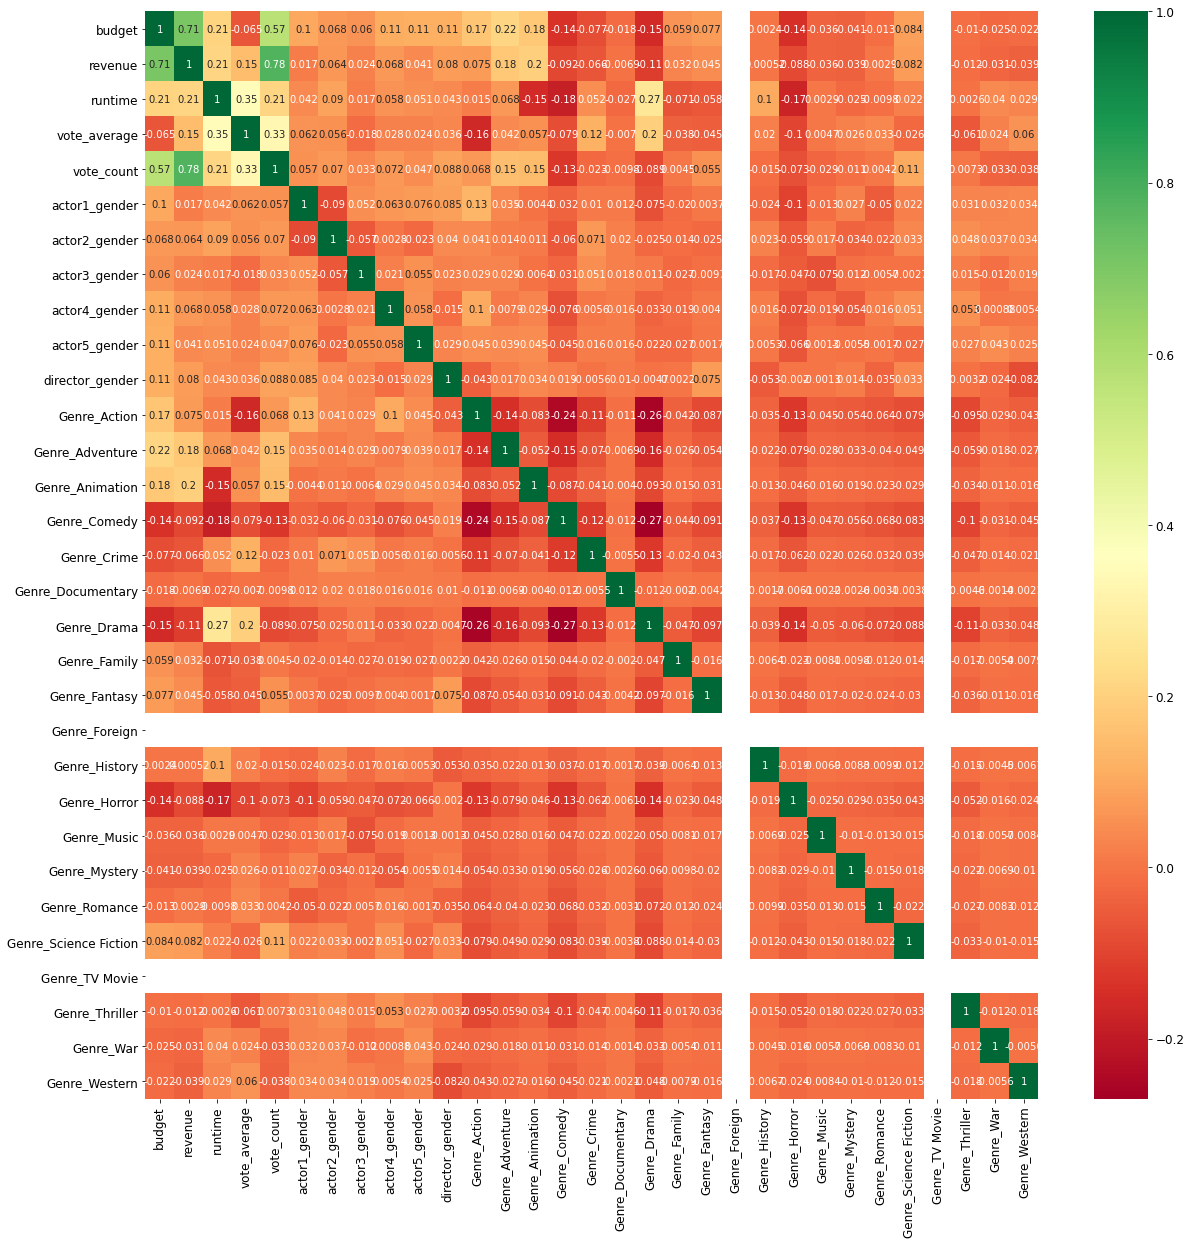

In [27]:
# plotting a heat map representing correlation of all attributes with each other in Hollywood dataframe
holly_corr_features = holly_corr_matrix.index
plt.figure(figsize=(20,20))
g=sns.heatmap(hollywood_final[holly_corr_features].corr(),annot=True,cmap="RdYlGn")

In [28]:
# computes the standard correlation coefficient (Pearson’s r) between every pair of attributes in Bollywood dataframe
bolly_corr_matrix = bollywood_final.corr() 
bolly_corr_matrix

,budget,revenue,runtime,vote_average,vote_count,actor1_gender,actor2_gender,actor3_gender,actor4_gender,actor5_gender,...,Genre_Fantasy,Genre_Foreign,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War
budget,1.000000,0.686427,0.104006,0.161373,0.495683,0.152802,0.041854,0.076277,0.023494,-0.089431,...,NaN,-0.005789,0.066111,-0.066496,0.019633,0.082976,-0.080710,NaN,-0.072669,NaN
revenue,0.686427,1.000000,0.172995,0.168258,0.305382,0.166459,-0.057201,0.063637,0.158592,-0.119178,...,NaN,-0.024021,0.163888,-0.086791,-0.090640,-0.054933,-0.038626,NaN,-0.113006,NaN
runtime,0.104006,0.172995,1.000000,0.127903,0.242448,0.198634,-0.098464,-0.051822,0.096142,-0.022088,...,NaN,0.000979,0.114757,-0.096069,0.013786,-0.104853,0.072697,NaN,-0.327436,NaN
vote_average,0.161373,0.168258,0.127903,1.000000,0.331164,-0.056097,-0.136460,-0.016162,-0.084625,-0.039336,...,NaN,-0.018197,0.065676,-0.063862,-0.093738,0.041002,-0.201653,NaN,0.023182,NaN
vote_count,0.495683,0.305382,0.242448,0.331164,1.000000,0.129299,0.028332,-0.067612,-0.079404,-0.114302,...,NaN,-0.065180,0.064000,-0.039324,-0.066385,-0.008327,-0.070000,NaN,-0.057663,NaN
actor1_gender,0.152802,0.166459,0.198634,-0.056097,0.129299,1.000000,-0.133466,-0.182508,-0.066913,-0.061251,...,NaN,-0.082976,0.050304,0.050304,-0.339448,0.050304,0.088005,NaN,-0.085920,NaN
actor2_gender,0.041854,-0.057201,-0.098464,-0.136460,0.028332,-0.133466,1.000000,0.173584,0.094946,0.024167,...,NaN,-0.027495,-0.015717,-0.015717,0.050408,0.117874,-0.027495,NaN,0.025102,NaN
actor3_gender,0.076277,0.063637,-0.051822,-0.016162,-0.067612,-0.182508,0.173584,1.000000,0.070742,0.057232,...,NaN,-0.075269,-0.002390,-0.002390,0.137993,-0.002390,-0.075269,NaN,-0.005454,NaN
actor4_gender,0.023494,0.158592,0.096142,-0.084625,-0.079404,-0.066913,0.094946,0.070742,1.000000,0.028931,...,NaN,-0.107521,-0.098775,0.125115,0.088321,-0.098775,-0.042241,NaN,-0.123205,NaN
actor5_gender,-0.089431,-0.119178,-0.022088,-0.039336,-0.114302,-0.061251,0.024167,0.057232,0.028931,1.000000,...,NaN,0.091321,-0.095699,-0.095699,0.026635,-0.095699,0.091321,NaN,-0.218357,NaN


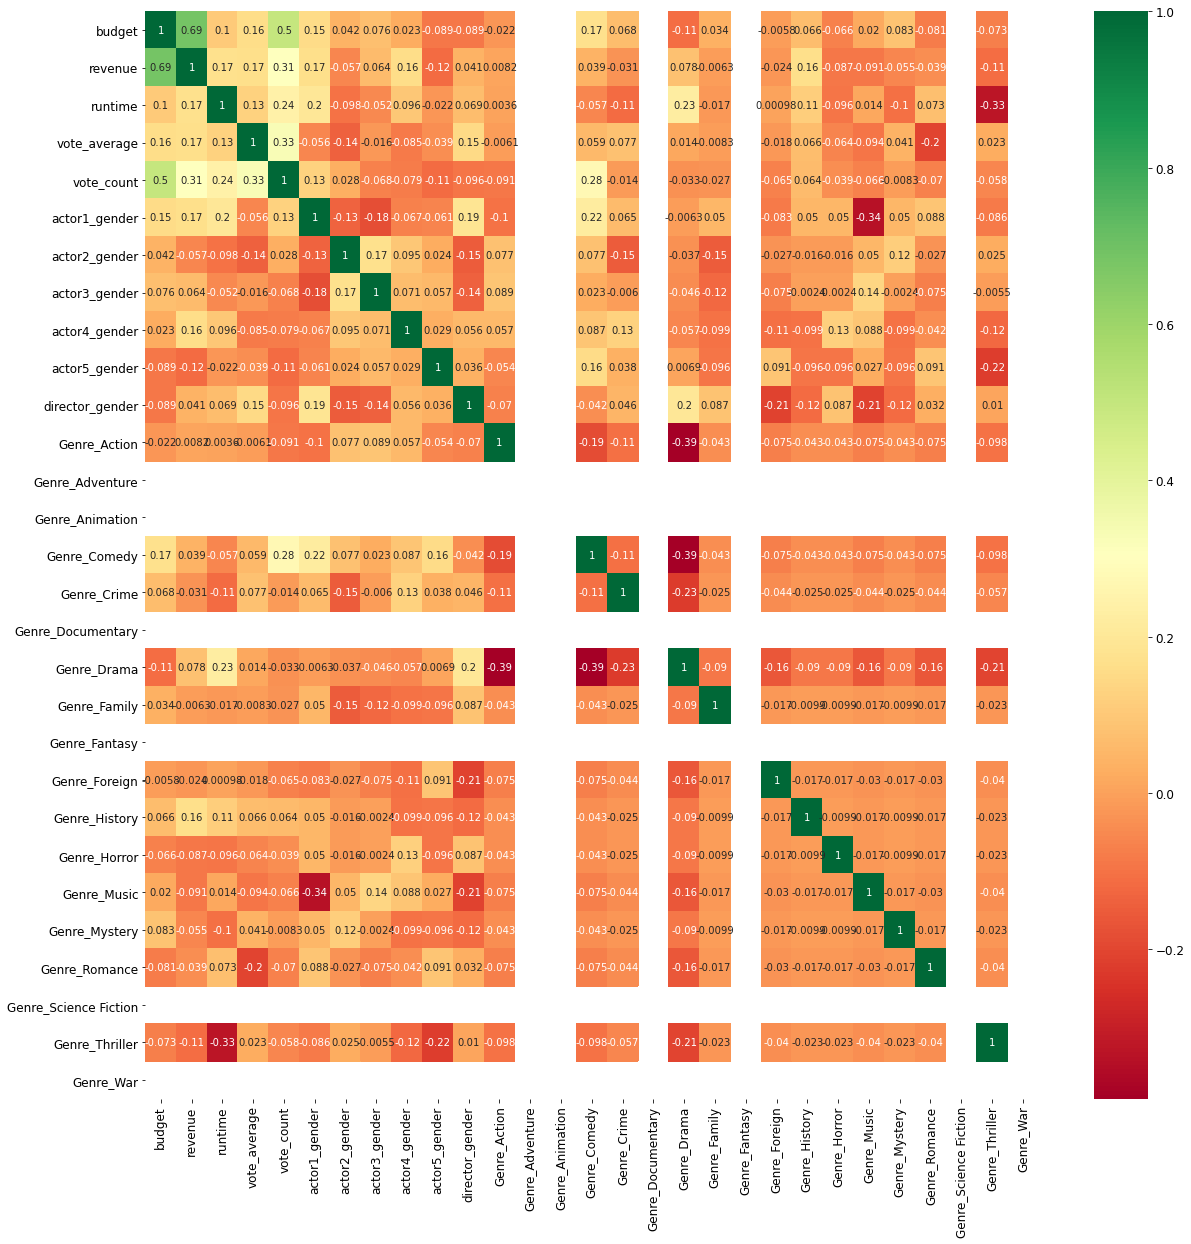

In [29]:
# plotting a heat map representing correlation of all attributes with each other in Bollywood dataframe
bolly_corr_features = bolly_corr_matrix.index
plt.figure(figsize=(20,20))
g=sns.heatmap(bollywood_final[bolly_corr_features].corr(),annot=True,cmap="RdYlGn")

# GENDER PREDICTION

# Names to predict gender for (prediction set)

In [30]:
# filtering out the names in 'actor1_name' column that have not been assigned a gender in 'actor1_gender' column in Hollywood dataframe
holly_actor1 = hollywood_final[['actor1_name']].loc[(hollywood_final['actor1_gender'] == 0)]
holly_actor1.rename(columns = {'actor1_name':'name'}, inplace = True)
holly_actor1

,name
43,Bela Lugosi
53,Audrey Hepburn
232,Henry Thomas
306,Mia Farrow
596,Vern Stierman
1177,Chris Stafford
1327,Dolly Read
1362,Simon Chuckster
1627,Lori Cardille
1749,Ali MacGraw


In [31]:
# filtering out the names in 'actor2_name' column that have not been assigned a gender in 'actor2_gender' column in Hollywood dataframe
holly_actor2 = hollywood_final[['actor2_name']].loc[(hollywood_final['actor2_gender'] == 0)]
holly_actor2.rename(columns = {'actor2_name':'name'}, inplace = True)
holly_actor2

,name
72,Catherine McCormack
103,Jack Albertson
223,Albert Finney
272,David Lochary
289,Sarah Berry
...,...
20134,Alice Englert
29360,Astro
29814,Peyman Moaadi
29886,Jaeden Lieberher


In [32]:
# filtering out the names in 'actor3_name' column that have not been assigned a gender in 'actor3_gender' column in Hollywood dataframe
holly_actor3 = hollywood_final[['actor3_name']].loc[(hollywood_final['actor3_gender'] == 0)]
holly_actor3.rename(columns = {'actor3_name':'name'}, inplace = True)
holly_actor3

,name
24,Paul Freeman
25,Jonathan Ke Quan
39,Michael Scholes
47,George Takei
48,DeForest Kelley
...,...
29755,Stephen Boss
31908,Daniel Zovatto
32129,Joey Morgan
32394,Jason Mitchell


In [33]:
# filtering out the names in 'actor4_name' column that have not been assigned a gender in 'actor4_gender' column in Hollywood dataframe
holly_actor4 = hollywood_final[['actor4_name']].loc[(hollywood_final['actor4_gender'] == 0)]
holly_actor4.rename(columns = {'actor4_name':'name'}, inplace = True)
holly_actor4

,name
25,Amrish Puri
32,Cindy Morgan
77,Amy Robinson
82,Franky G
94,Richard S. Castellano
...,...
32394,Neil Brown Jr.
32974,Richard Pepple
34501,Bradley Whitford
36912,José Manuel Trujillo Salas


In [34]:
# filtering out the names in 'actor5_name' column that have not been assigned a gender in 'actor5_gender' column in Hollywood dataframe
holly_actor5 = hollywood_final[['actor5_name']].loc[(hollywood_final['actor5_gender'] == 0)]
holly_actor5.rename(columns = {'actor5_name':'name'}, inplace = True)
holly_actor5

,name
21,Joe Turkel
25,Roshan Seth
32,Barnard Hughes
48,George Takei
55,George Takei
...,...
30819,T.I.
32394,Aldis Hodge
32461,Jemaine Clement
32974,Ama K. Abebrese


In [35]:
# filtering out the names in 'director_name' column that have not been assigned a gender in 'director_gender' column in Hollywood dataframe
holly_director = hollywood_final[['director_name']].loc[(hollywood_final['director_gender'] == 0)]
holly_director.rename(columns = {'director_name':'name'}, inplace = True)
holly_director

,name
46,Walter Hill
58,Richard Fleischer
95,Billy Wilder
100,Frank Capra
107,Joel Coen
...,...
37168,Scott Mann
37992,Stuart Hazeldine
40847,Theodore Melfi
40921,Sam Liu


In [36]:
# filtering out the names in 'producer_name' column that have not been assigned a gender in Hollywood dataframe
holly_producer = hollywood_final[['producer_name']].loc[:]
holly_producer.rename(columns = {'producer_name':'name'}, inplace = True)
holly_producer

,name
2,Graham Walters
3,Wendy Finerman
4,Bruce Cohen
5,Orson Welles
7,Jerry Bruckheimer
...,...
41134,Scott Stuber
42000,Scott Rudin
42327,Matthew Kaplan
42441,Youree Henley


In [37]:
# filtering out the names in 'editor_name' column that have not been assigned a gender in Hollywood dataframe
holly_editor = hollywood_final[['editor_name']].loc[:]
holly_editor.rename(columns = {'editor_name':'name'}, inplace = True)
holly_editor

,name
2,David Ian Salter
3,Arthur Schmidt
4,Christopher Greenbury
5,Robert Wise
7,Stephen E. Rivkin
...,...
41134,Jeff Groth
42000,Hughes Winborne
42327,Joe Landauer
42441,Sarah Flack


In [38]:
# filtering out the names in 'screeplay_name' column that have not been assigned a gender in Hollywood dataframe
holly_screenplay = hollywood_final[['screeplay_name']].loc[:]
holly_screenplay.rename(columns = {'screeplay_name':'name'}, inplace = True)
holly_screenplay

,name
2,Andrew Stanton
3,Eric Roth
4,Alan Ball
5,Orson Welles
7,Ted Elliott
...,...
41134,Gene Stupnitsky
42000,August Wilson
42327,Maria Maggenti
42441,Sofia Coppola


In [39]:
# assigning all the filtered names into a new dataframe
holly_gender_identification = holly_actor1.append([holly_actor2, holly_actor3, holly_actor4, holly_actor5, holly_director,
                                               holly_producer, holly_editor, holly_screenplay],ignore_index = True)
holly_gender_identification

,name
0,Bela Lugosi
1,Audrey Hepburn
2,Henry Thomas
3,Mia Farrow
4,Vern Stierman
...,...
6302,Gene Stupnitsky
6303,August Wilson
6304,Maria Maggenti
6305,Sofia Coppola


In [40]:
# removing the last names and keeping only the first names
holly_gender_identification[['first_name','last_name']] = holly_gender_identification['name'].str.split(' ',n=1,expand=True)
holly_gender_identification = holly_gender_identification.drop(["last_name","name"], axis=1) 
holly_gender_identification.rename(columns = {'first_name':'name'}, inplace = True)
holly_gender_identification

,name
0,Bela
1,Audrey
2,Henry
3,Mia
4,Vern
...,...
6302,Gene
6303,August
6304,Maria
6305,Sofia


In [41]:
# length of the dataframe containing the names whose gender is to be predicted
h_length = holly_gender_identification.shape[0]

In [42]:
# filtering out the names in 'actor1_name' column that have not been assigned a gender in 'actor1_gender' column in Bollywood dataframe
bolly_actor1 = bollywood_final[['actor1_name']].loc[(bollywood_final['actor1_gender'] == 0)]
bolly_actor1.rename(columns = {'actor1_name':'name'}, inplace = True)
bolly_actor1

,name
3,Rani Mukerji
14,Abhishek Bachchan
37,Abhishek Bachchan
65,Anupam Kher
80,Rani Mukerji
94,Om Puri
179,Bobby Deol
241,Bobby Deol
280,Tiku Talsania
291,Salman Khan


In [43]:
# filtering out the names in 'actor2_name' column that have not been assigned a gender in 'actor2_gender' column in Bollywood dataframe
bolly_actor2 = bollywood_final[['actor2_name']].loc[(bollywood_final['actor2_gender'] == 0)]
bolly_actor2.rename(columns = {'actor2_name':'name'}, inplace = True)
bolly_actor2

,name
14,Rani Mukerji
28,Rani Mukerji
29,Rani Mukerji
34,Suchitra Krishnamoorthi
38,Gayatri Joshi
77,Paresh Rawal
86,Abhishek Bachchan
94,Chandrachur Singh
97,Karisma Kapoor
110,Amrish Puri


In [44]:
# filtering out the names in 'actor3_name' column that have not been assigned a gender in 'actor3_gender' column in Bollywood dataframe
bolly_actor3 = bollywood_final[['actor3_name']].loc[(bollywood_final['actor3_gender'] == 0)]
bolly_actor3.rename(columns = {'actor3_name':'name'}, inplace = True)
bolly_actor3

,name
2,Rani Mukerji
16,Rani Mukerji
20,Karisma Kapoor
22,Bobby Deol
28,Angelina Idnani
34,Deepak Tijori
47,Anupam Kher
51,Amrish Puri
58,Paresh Rawal
77,Om Puri


In [45]:
# filtering out the names in 'actor4_name' column that have not been assigned a gender in 'actor4_gender' column in Bollywood dataframe
bolly_actor4 = bollywood_final[['actor4_name']].loc[(bollywood_final['actor4_gender'] == 0)]
bolly_actor4.rename(columns = {'actor4_name':'name'}, inplace = True)
bolly_actor4

,name
6,Vikram Gokhale
7,Vipin Sharma
22,Abhishek Bachchan
28,Angelina Idnani
29,Abhishek Bachchan
38,Smith Seth
46,Om Puri
51,Satish Shah
65,Deepal Shaw
68,Cyrus Broacha


In [46]:
# filtering out the names in 'actor5_name' column that have not been assigned a gender in 'actor5_gender' column in Bollywood dataframe
bolly_actor5 = bollywood_final[['actor5_name']].loc[(bollywood_final['actor5_gender'] == 0)]
bolly_actor5.rename(columns = {'actor5_name':'name'}, inplace = True)
bolly_actor5

,name
7,Tanay Chheda
13,Preeti Jhangiani
14,Tania Zaetta
28,Master Ali Haji
38,Lekh Tandon
51,Anupam Kher
65,Aamir Bashir
67,Vipin Sharma
68,Simone Singh
85,Amrish Puri


In [47]:
# filtering out the names in 'director_name' column that have not been assigned a gender in 'director_gender' column in Bollywood dataframe
bolly_director = bollywood_final[['director_name']].loc[(bollywood_final['director_gender'] == 0)]
bolly_director.rename(columns = {'director_name':'name'}, inplace = True)
bolly_director

,name
3,Kunal Kohli
4,Nikhil Advani
13,Aditya Chopra
14,Shaad Ali
22,Tarun Mansukhani
47,Rakesh Roshan
51,Aditya Chopra
57,Rajkumar Hirani
65,Neeraj Pandey
68,Krishna D.K.


In [48]:
# filtering out the names in 'producer_name' column that have not been assigned a gender in Bollywood dataframe
bolly_producer = bollywood_final[['producer_name']].loc[:]
bolly_producer.rename(columns = {'producer_name':'name'}, inplace = True)
bolly_producer

,name
2,Yash Chopra
3,Yash Chopra
4,Karan Johar
5,Juhi Chawla
6,Sanjay Leela Bhansali
...,...
556,Rakesh Roshan
557,A.R. Murugadoss
558,Boney Kapoor
577,Karan Johar


In [49]:
# filtering out the names in 'editor_name' column that have not been assigned a gender in Bollywood dataframe
bolly_editor = bollywood_final[['editor_name']].loc[:]
bolly_editor.rename(columns = {'editor_name':'name'}, inplace = True)
bolly_editor

,name
2,Ritesh Soni
3,Ritesh Soni
4,Sanjay Sankla
5,A. Sreekar Prasad
6,Bela Segal
...,...
556,Akiv Ali
557,A. Sreekar Prasad
558,Monisha A Baldwa
577,Hemanti Sarkar


In [50]:
# filtering out the names in 'screeplay_name' column that have not been assigned a gender in Bollywood dataframe
bolly_screenplay = bollywood_final[['screeplay_name']].loc[:]
bolly_screenplay.rename(columns = {'screeplay_name':'name'}, inplace = True)
bolly_screenplay

,name
2,Aditya Chopra
3,Kunal Kohli
4,Karan Johar
5,Saket Chaudhary
6,Sanjay Leela Bhansali
...,...
556,Vijay Kumar Mishra
557,A.R. Murugadoss
558,Girish Kohli
577,Gauri Shinde


In [51]:
# assigning all the filtered names into a new dataframe
bolly_gender_identification = bolly_actor1.append([bolly_actor2, bolly_actor3, bolly_actor4, bolly_actor5, bolly_director,
                                              bolly_producer, bolly_editor, bolly_screenplay],ignore_index = True)
bolly_gender_identification

,name
0,Rani Mukerji
1,Abhishek Bachchan
2,Abhishek Bachchan
3,Anupam Kher
4,Rani Mukerji
...,...
506,Vijay Kumar Mishra
507,A.R. Murugadoss
508,Girish Kohli
509,Gauri Shinde


In [52]:
# removing the last names and keeping only the first names
bolly_gender_identification[['first_name','last_name']] = bolly_gender_identification['name'].str.split(' ',n=1,expand=True)
bolly_gender_identification = bolly_gender_identification.drop(["last_name","name"], axis=1) 
bolly_gender_identification.rename(columns = {'first_name':'name'}, inplace = True)
bolly_gender_identification

,name
0,Rani
1,Abhishek
2,Abhishek
3,Anupam
4,Rani
...,...
506,Vijay
507,A.R.
508,Girish
509,Gauri


In [53]:
# length of the dataframe containing the names whose gender is to be predicted
b_length = bolly_gender_identification.shape[0]

# Names used for testing the models (testing set)

In [54]:
# filtering out the names in 'actor1_name' column that have been assigned a gender in 'actor1_gender' column in Hollywood dataframe
holly_actor1_genders = hollywood_final[['actor1_name','actor1_gender']].loc[(hollywood_final['actor1_gender'] == 1) | (hollywood_final['actor1_gender'] == 2)]
holly_actor1_genders.rename(columns = {'actor1_name':'name','actor1_gender':'gender'}, inplace = True)
holly_actor1_genders

,name,gender
2,Albert Brooks,2
3,Tom Hanks,2
4,Kevin Spacey,2
5,Orson Welles,2
7,Johnny Depp,2
...,...,...
41134,Jason Bateman,2
42000,Denzel Washington,2
42327,Zoey Deutch,1
42441,Colin Farrell,2


In [55]:
# filtering out the names in 'actor2_name' column that have been assigned a gender in 'actor2_gender' column in Hollywood dataframe
holly_actor2_genders = hollywood_final[['actor2_name','actor2_gender']].loc[(hollywood_final['actor2_gender'] == 1) | (hollywood_final['actor2_gender'] == 2)]
holly_actor2_genders.rename(columns = {'actor2_name':'name','actor2_gender':'gender'}, inplace = True)
holly_actor2_genders

,name,gender
2,Ellen DeGeneres,1.0
3,Robin Wright,1.0
4,Annette Bening,1.0
5,Joseph Cotten,2.0
7,Geoffrey Rush,2.0
...,...,...
41134,Olivia Munn,1.0
42000,Viola Davis,1.0
42327,Halston Sage,1.0
42441,Nicole Kidman,1.0


In [56]:
# filtering out the names in 'actor3_name' column that have been assigned a gender in 'actor3_gender' column in Hollywood dataframe
holly_actor3_genders = hollywood_final[['actor3_name','actor3_gender']].loc[(hollywood_final['actor3_gender'] == 1) | (hollywood_final['actor3_gender'] == 2)]
holly_actor3_genders.rename(columns = {'actor3_name':'name','actor3_gender':'gender'}, inplace = True)
holly_actor3_genders

,name,gender
2,Alexander Gould,2
3,Gary Sinise,2
4,Thora Birch,1
5,Dorothy Comingore,1
7,Orlando Bloom,2
...,...,...
41134,T.J. Miller,2
42000,Stephen Henderson,2
42327,Logan Miller,2
42441,Kirsten Dunst,1


In [57]:
# filtering out the names in 'actor4_name' column that have been assigned a gender in 'actor4_gender' column in Hollywood dataframe
holly_actor4_genders = hollywood_final[['actor4_name','actor4_gender']].loc[(hollywood_final['actor4_gender'] == 1) | (hollywood_final['actor4_gender'] == 2) ]
holly_actor4_genders.rename(columns = {'actor4_name':'name','actor4_gender':'gender'}, inplace = True)
holly_actor4_genders

,name,gender
2,Willem Dafoe,2
3,Mykelti Williamson,2
4,Wes Bentley,2
5,Ray Collins,2
7,Keira Knightley,1
...,...,...
40921,Ray Wise,2
41134,Jennifer Aniston,1
42000,Jovan Adepo,2
42441,Elle Fanning,1


In [58]:
# filtering out the names in 'actor5_name' column that have been assigned a gender in 'actor5_gender' column in Hollywood dataframe
holly_actor5_genders = hollywood_final[['actor5_name','actor5_gender']].loc[(hollywood_final['actor5_gender'] == 1) | (hollywood_final['actor5_gender'] == 2)]
holly_actor5_genders.rename(columns = {'actor5_name':'name','actor5_gender':'gender'}, inplace = True)
holly_actor5_genders

,name,gender
2,Brad Garrett,2
3,Sally Field,1
4,Mena Suvari,1
5,George Coulouris,2
7,Jack Davenport,2
...,...,...
41134,Kate McKinnon,1
42000,Russell Hornsby,2
42327,Jennifer Beals,1
42441,Angourie Rice,1


In [59]:
# filtering out the names in 'director_name' column that have been assigned a gender in 'director_gender' column in Hollywood dataframe
holly_director_genders = hollywood_final[['director_name','director_gender']].loc[(hollywood_final['director_gender'] == 1) | (hollywood_final['director_gender'] == 2)]
holly_director_genders.rename(columns = {'director_name':'name','director_gender':'gender'}, inplace = True)
holly_director_genders

,name,gender
2,Andrew Stanton,2.0
3,Robert Zemeckis,2.0
4,Sam Mendes,2.0
5,Orson Welles,2.0
7,Gore Verbinski,2.0
...,...,...
40497,Barry Jenkins,2.0
41134,Josh Gordon,2.0
42000,Denzel Washington,2.0
42441,Sofia Coppola,1.0


In [60]:
# assigning all the filtered names to a new dataframe
holly_genders = holly_actor1_genders.append([holly_actor2_genders, holly_actor3_genders, holly_actor4_genders, 
                                            holly_actor5_genders, holly_director_genders],ignore_index = True)
holly_genders

,name,gender
0,Albert Brooks,2.0
1,Tom Hanks,2.0
2,Kevin Spacey,2.0
3,Orson Welles,2.0
4,Johnny Depp,2.0
...,...,...
10374,Barry Jenkins,2.0
10375,Josh Gordon,2.0
10376,Denzel Washington,2.0
10377,Sofia Coppola,1.0


In [61]:
# removing the last names and keeping only the first names
holly_genders[['first_name','last_name']] = holly_genders['name'].str.split(' ',n=1,expand=True)
holly_genders = holly_genders.drop(["last_name","name"], axis=1) 
holly_genders = holly_genders[['first_name','gender']]
holly_genders

,first_name,gender
0,Albert,2.0
1,Tom,2.0
2,Kevin,2.0
3,Orson,2.0
4,Johnny,2.0
...,...,...
10374,Barry,2.0
10375,Josh,2.0
10376,Denzel,2.0
10377,Sofia,1.0


In [62]:
# removing duplicates 
holly_genders.drop_duplicates(subset ="first_name",keep = 'first', inplace = True)
holly_genders.rename(columns = {'first_name':'name'}, inplace = True)
holly_genders

,name,gender
0,Albert,2.0
1,Tom,2.0
2,Kevin,2.0
3,Orson,2.0
4,Johnny,2.0
...,...,...
10351,Thea,1.0
10355,J,2.0
10358,Travis,2.0
10360,Gareth,2.0


In [63]:
# length of the dataframe containing names whose genders have been specified
holly_genders_length = holly_genders.shape[0]

In [64]:
# filtering out the names in 'actor1_name' column that have been assigned a gender in 'actor1_gender' column in Bollywood dataframe
bolly_actor1_genders = bollywood_final[['actor1_name','actor1_gender']].loc[(bollywood_final['actor1_gender'] == 1) | (bollywood_final['actor1_gender'] == 2)]
bolly_actor1_genders.rename(columns = {'actor1_name':'name','actor1_gender':'gender'}, inplace = True)
bolly_actor1_genders

,name,gender
2,Shah Rukh Khan,2
4,Shah Rukh Khan,2
5,Shah Rukh Khan,2
6,Aishwarya Rai Bachchan,1
7,Darsheel Safary,2
...,...,...
556,Hrithik Roshan,2
557,Sonakshi Sinha,1
558,Sridevi Kapoor,1
577,Alia Bhatt,1


In [65]:
# filtering out the names in 'actor2_name' column that have been assigned a gender in 'actor2_gender' column in Bollywood dataframe
bolly_actor2_genders = bollywood_final[['actor2_name','actor2_gender']].loc[(bollywood_final['actor2_gender'] == 1) | (bollywood_final['actor2_gender'] == 2)]
bolly_actor2_genders.rename(columns = {'actor2_name':'name','actor2_gender':'gender'}, inplace = True)
bolly_actor2_genders

,name,gender
2,Preity Zinta,1.0
3,Saif Ali Khan,2.0
4,Preity Zinta,1.0
5,Kareena Kapoor,1.0
6,Salman Khan,2.0
...,...,...
538,Alia Bhatt,1.0
557,Konkona Sen Sharma,1.0
558,Sajal Ali,1.0
577,Shah Rukh Khan,2.0


In [66]:
# filtering out the names in 'actor3_name' column that have been assigned a gender in 'actor3_gender' column in Bollywood dataframe
bolly_actor3_genders = bollywood_final[['actor3_name','actor3_gender']].loc[(bollywood_final['actor3_gender'] == 1) | (bollywood_final['actor3_gender'] == 2)]
bolly_actor3_genders.rename(columns = {'actor3_name':'name','actor3_gender':'gender'}, inplace = True)
bolly_actor3_genders

,name,gender
3,Kirron Kher,1
4,Saif Ali Khan,2
5,Ajith Kumar,2
6,Ajay Devgn,2
7,Tisca Chopra,1
...,...,...
538,Kareena Kapoor,1
556,Ronit Roy,2
558,Akshaye Khanna,2
577,Ali Zafar,2


In [67]:
# filtering out the names in 'actor4_name' column that have been assigned a gender in 'actor4_gender' column in Bollywood dataframe
bolly_actor4_genders = bollywood_final[['actor4_name','actor4_gender']].loc[(bollywood_final['actor4_gender'] == 1) | (bollywood_final['actor4_gender'] == 2)]
bolly_actor4_genders.rename(columns = {'actor4_name':'name','actor4_gender':'gender'}, inplace = True)
bolly_actor4_genders

,name,gender
2,Amitabh Bachchan,2
3,Rati Agnihotri,1
4,Jaya Bachchan,1
5,Danny Denzongpa,2
9,Shreyas Talpade,2
11,Jaya Bachchan,1
13,Jimmy Shergill,2
14,Raj Babbar,2
16,Salman Khan,2
20,Akshay Kumar,2


In [68]:
# filtering out the names in 'actor5_name' column that have been assigned a gender in 'actor5_gender' column in Bollywood dataframe
bolly_actor5_genders = bollywood_final[['actor5_name','actor5_gender']].loc[(bollywood_final['actor5_gender'] == 1) | (bollywood_final['actor5_gender'] == 2)]
bolly_actor5_genders.rename(columns = {'actor5_name':'name','actor5_gender':'gender'}, inplace = True)
bolly_actor5_genders

,name,gender
2,Hema Malini,1
3,Rishi Kapoor,2
4,Sonali Bendre,1
5,Rahul Dev,2
6,Smita Jaykar,1
9,Kirron Kher,1
11,Hrithik Roshan,2
16,Neelam Kothari,1
20,Farida Jalal,1
22,Shilpa Shetty,1


In [69]:
# filtering out the names in 'director_name' column that have been assigned a gender in 'director_gender' column in Bollywood dataframe
bolly_director_genders = bollywood_final[['director_name','director_gender']].loc[(bollywood_final['director_gender'] == 1) | (bollywood_final['director_gender'] == 2)]
bolly_director_genders.rename(columns = {'director_name':'name','director_gender':'gender'}, inplace = True)
bolly_director_genders

,name,gender
2,Yash Chopra,2.0
5,Santosh Sivan,2.0
6,Sanjay Leela Bhansali,2.0
7,Aamir Khan,2.0
9,Farah Khan,1.0
...,...,...
531,Anurag Kashyap,2.0
535,Rajesh Pillai,2.0
538,Abhishek Chaubey,2.0
556,Sanjay Gupta,2.0


In [70]:
# assigning all the filtered names to a new dataframe
bolly_genders = bolly_actor1_genders.append([bolly_actor2_genders, bolly_actor3_genders, bolly_actor4_genders, 
                                             bolly_actor5_genders, bolly_director_genders],ignore_index = True)
bolly_genders

,name,gender
0,Shah Rukh Khan,2.0
1,Shah Rukh Khan,2.0
2,Shah Rukh Khan,2.0
3,Aishwarya Rai Bachchan,1.0
4,Darsheel Safary,2.0
...,...,...
402,Anurag Kashyap,2.0
403,Rajesh Pillai,2.0
404,Abhishek Chaubey,2.0
405,Sanjay Gupta,2.0


In [71]:
# removing the last names and keeping only the first names
bolly_genders[['first_name','last_name']] = bolly_genders['name'].str.split(' ',n=1,expand=True)
bolly_genders = bolly_genders.drop(["last_name","name"], axis=1) 
bolly_genders = bolly_genders[['first_name','gender']]
bolly_genders

,first_name,gender
0,Shah,2.0
1,Shah,2.0
2,Shah,2.0
3,Aishwarya,1.0
4,Darsheel,2.0
...,...,...
402,Anurag,2.0
403,Rajesh,2.0
404,Abhishek,2.0
405,Sanjay,2.0


In [72]:
# removing duplicates
bolly_genders.drop_duplicates(subset ="first_name",keep = 'first', inplace = True)
bolly_genders.rename(columns = {'first_name':'name'}, inplace = True)
bolly_genders

,name,gender
0,Shah,2.0
3,Aishwarya,1.0
4,Darsheel,2.0
7,Amitabh,2.0
10,John,2.0
...,...,...
397,Praveen,2.0
398,Vikramaditya,2.0
400,K.,1.0
404,Abhishek,2.0


In [73]:
# length of the dataframe containing names whose genders have been specified
bolly_genders_length = bolly_genders.shape[0]

# Names used for training the models (training set)

In [74]:
# loading a dataset containing American names
american_names = pd.read_csv('american_names.csv')
american_names

,name,gender
0,Mary,F
1,Anna,F
2,Emma,F
3,Elizabeth,F
4,Minnie,F
...,...,...
1048570,Erendira,F
1048571,Gema,F
1048572,Ina,F
1048573,Jacelyn,F


In [75]:
# replacing values 'F' amd 'M' with '1' amd '2' respectively
american_names = american_names.replace(to_replace ="F",value =1)
american_names = american_names.replace(to_replace ="M",value =2)
american_names

,name,gender
0,Mary,1
1,Anna,1
2,Emma,1
3,Elizabeth,1
4,Minnie,1
...,...,...
1048570,Erendira,1
1048571,Gema,1
1048572,Ina,1
1048573,Jacelyn,1


In [76]:
# removing duplicates
american_names = american_names.drop_duplicates(subset='name', keep="first")
american_names

,name,gender
0,Mary,1
1,Anna,1
2,Emma,1
3,Elizabeth,1
4,Minnie,1
...,...,...
1046784,Cassandr,1
1047245,Unnamed,1
1047384,Audreanna,1
1048030,Jacquely,1


In [77]:
# removing NaN values
american_names = american_names.dropna()
american_names

,name,gender
0,Mary,1
1,Anna,1
2,Emma,1
3,Elizabeth,1
4,Minnie,1
...,...,...
1046784,Cassandr,1
1047245,Unnamed,1
1047384,Audreanna,1
1048030,Jacquely,1


In [78]:
# loading a dataset containing Indian names
indian_names = pd.read_csv('indian_names.csv')
indian_names

,name,gender
0,Aaban,2
1,Aabharan,2
2,Aabhas,2
3,Aabhat,2
4,Aabheer,2
...,...,...
55686,Zumathy,1
55687,Zurika,1
55688,Zuruthi,1
55689,Zuruthika,1


In [79]:
# removing duplicates
indian_names = indian_names.drop_duplicates(subset='name', keep="first")
indian_names

,name,gender
0,Aaban,2
1,Aabharan,2
2,Aabhas,2
3,Aabhat,2
4,Aabheer,2
...,...,...
55686,Zumathy,1
55687,Zurika,1
55688,Zuruthi,1
55689,Zuruthika,1


In [80]:
# removing NaN values
indian_names = indian_names.dropna()
indian_names

,name,gender
0,Aaban,2
1,Aabharan,2
2,Aabhas,2
3,Aabhat,2
4,Aabheer,2
...,...,...
55686,Zumathy,1
55687,Zurika,1
55688,Zuruthi,1
55689,Zuruthika,1


# Removing common names between the training and testing sets from the training sets

In [81]:
c = american_names['name'].isin(holly_genders['name'])
american_names.drop(american_names[c].index, inplace = True)
american_names

,name,gender
6,Ida,1
8,Bertha,1
11,Clara,1
14,Cora,1
17,Nellie,1
...,...,...
1046784,Cassandr,1
1047245,Unnamed,1
1047384,Audreanna,1
1048030,Jacquely,1


In [89]:
american_names_length = american_names.shape[0]
american_names_length

49683

In [82]:
c = indian_names['name'].isin(bolly_genders['name'])
indian_names.drop(indian_names[c].index, inplace = True)
indian_names

,name,gender
0,Aaban,2
1,Aabharan,2
2,Aabhas,2
3,Aabhat,2
4,Aabheer,2
...,...,...
55686,Zumathy,1
55687,Zurika,1
55688,Zuruthi,1
55689,Zuruthika,1


In [88]:
indian_names_length = indian_names.shape[0]
indian_names_length

54792

# Checking for names ending with a vowel

In [83]:
# function for checking if a name ends with a vowel
def vowel_ending(names):
    count = 0
    for name in names:
        if (str(name)[-1] == 'a' or str(name)[-1] == 'e' or str(name)[-1] == 'i' or str(name)[-1] == 'o' or str(name)[-1] == 'u' or 
        str(name)[-1] == 'A' or str(name)[-1] == 'E' or str(name)[-1] == 'I' or str(name)[-1] == 'O' or str(name)[-1] == 'U'):
            count += 1
    return count

In [84]:
a = vowel_ending(american_names['name'].loc[american_names['gender'] == 1])
print('American female names ending with a vowel : {} '.format(a))

American female names ending with a vowel : 25191 


In [85]:
b = vowel_ending(american_names['name'].loc[american_names['gender'] == 2])
print('American male names ending with a vowel : {} '.format(b))

American male names ending with a vowel : 4258 


In [86]:
c = vowel_ending(indian_names['name'].loc[indian_names['gender'] == 1])
print('Indian female names ending with a vowel : {} '.format(c))

Indian female names ending with a vowel : 23127 


In [87]:
d = vowel_ending(indian_names['name'].loc[indian_names['gender'] == 2])
print('Indian male names ending with a vowel : {} '.format(d))

Indian male names ending with a vowel : 4362 


In [90]:
e = american_names['name'].loc[american_names['gender'] == 1].count()
print('American female names : {} '.format(e))

American female names : 32888 


In [91]:
f = american_names['name'].loc[american_names['gender'] == 2].count()
print('American male names : {} '.format(f))

American male names : 16795 


In [92]:
g = indian_names['name'].loc[indian_names['gender'] == 1].count()
print('Indian female names : {} '.format(g))

Indian female names : 25150 


In [93]:
h = indian_names['name'].loc[indian_names['gender'] == 2].count()
print('Indian male names : {} '.format(h))

Indian male names : 29642 


In [94]:
print('Percentage of American female names ending with a vowel : {}% '.format(round((a / e)*100)))

Percentage of American female names ending with a vowel : 77% 


In [95]:
print('Percentage of American male names ending with a vowel : {}% '.format(round((b / f)*100)))

Percentage of American male names ending with a vowel : 25% 


In [96]:
print('Percentage of Indian female names ending with a vowel : {}% '.format(round((c / g)*100)))

Percentage of Indian female names ending with a vowel : 92% 


In [97]:
print('Percentage of Indian male names ending with a vowel : {}% '.format(round((d / h)*100)))

Percentage of Indian male names ending with a vowel : 15% 


# n-grams 

In [98]:
# function for extracting character n-grams from names
def n_grams(name,n):
  letters = [letter for letter in name]  
  token=zip(*[letters[i:] for i in range(n)])
  result=[' '.join(n) for n in token]
  return result

In [99]:
# appending the test and prediction sets to the training set containing American names
american_names = american_names.append([holly_genders,holly_gender_identification],ignore_index = True)
american_names

,name,gender
0,Ida,1.0
1,Bertha,1.0
2,Clara,1.0
3,Cora,1.0
4,Nellie,1.0
...,...,...
57686,Gene,NaN
57687,August,NaN
57688,Maria,NaN
57689,Sofia,NaN


In [100]:
# appending the test and prediction sets to the training set containing Indian names
indian_names = indian_names.append([bolly_genders,bolly_gender_identification],ignore_index = True)
indian_names

,name,gender
0,Aaban,2.0
1,Aabharan,2.0
2,Aabhas,2.0
3,Aabhat,2.0
4,Aabheer,2.0
...,...,...
55484,Vijay,NaN
55485,A.R.,NaN
55486,Girish,NaN
55487,Gauri,NaN


# Extracting n-gram suffix and vowel ending features and adding them as input features

In [101]:
unigram_suffix = []
bigram_suffix = []
trigram_suffix = []
is_vowel_ending = []
for i in american_names['name'].values:     
    unigram_suffix.append(n_grams(i,1)[-1]) 
    if len(i) >= 2:
        bigram_suffix.append(n_grams(i,2)[-1])
    else:
        bigram_suffix.append(' ')
    if len(i) >= 3:
        trigram_suffix.append(n_grams(i,3)[-1])
    else:
        trigram_suffix.append(' ')
    if (i[-1] == 'a' or i[-1] == 'e' or i[-1] == 'i' or i[-1] == 'o' or i[-1] == 'u' or 
    i[-1] == 'A' or i[-1] == 'E' or i[-1] == 'I' or i[-1] == 'O' or i[-1] == 'U'):
        is_vowel_ending.append(True)
    else:
        is_vowel_ending.append(False)
        
# contains the unigram suffixes of names
american_names['unigram_suffix'] = unigram_suffix
# contains the bigram suffixes of names
american_names['bigram_suffix'] = bigram_suffix
# contains the trigram suffixes of names
american_names['trigram_suffix'] = trigram_suffix
# contains Boolean values depending on the presence of a vowel as the last letter of a name
american_names['vowel_ending'] = is_vowel_ending
american_names

,name,gender,unigram_suffix,bigram_suffix,trigram_suffix,vowel_ending
0,Ida,1.0,a,d a,I d a,True
1,Bertha,1.0,a,h a,t h a,True
2,Clara,1.0,a,r a,a r a,True
3,Cora,1.0,a,r a,o r a,True
4,Nellie,1.0,e,i e,l i e,True
...,...,...,...,...,...,...
57686,Gene,NaN,e,n e,e n e,True
57687,August,NaN,t,s t,u s t,False
57688,Maria,NaN,a,i a,r i a,True
57689,Sofia,NaN,a,i a,f i a,True


In [102]:
# applying One-Hot Encoding to the n-gram suffix columns
unigram_dummies = pd.get_dummies(american_names.unigram_suffix,prefix='unigram_suffix') 
bigram_dummies = pd.get_dummies(american_names.bigram_suffix,prefix='bigram_suffix') 
trigram_dummies = pd.get_dummies(american_names.trigram_suffix,prefix='trigram_suffix') 
american_names = pd.concat([american_names, unigram_dummies,bigram_dummies,trigram_dummies ], axis=1)
american_names = american_names.drop(['unigram_suffix','bigram_suffix','trigram_suffix'],axis=1)
american_names

,name,gender,vowel_ending,unigram_suffix_.,unigram_suffix_0,unigram_suffix_A,unigram_suffix_D,unigram_suffix_E,unigram_suffix_G,unigram_suffix_J,...,trigram_suffix_z z e,trigram_suffix_z z i,trigram_suffix_z z y,trigram_suffix_É v a,trigram_suffix_å n s,trigram_suffix_è n e,trigram_suffix_é k y,trigram_suffix_í a n,trigram_suffix_ö r g,trigram_suffix_ö t z
0,Ida,1.0,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bertha,1.0,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Clara,1.0,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cora,1.0,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Nellie,1.0,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57686,Gene,NaN,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57687,August,NaN,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57688,Maria,NaN,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57689,Sofia,NaN,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
unigram_suffix = []
bigram_suffix = []
trigram_suffix = []
is_vowel_ending = []
for i in indian_names['name'].values:
    unigram_suffix.append(n_grams(i,1)[-1]) 
    if len(i) >= 2:
        bigram_suffix.append(n_grams(i,2)[-1])
    else:
        bigram_suffix.append(' ')
    if len(i) >= 3:
        trigram_suffix.append(n_grams(i,3)[-1])
    else:
        trigram_suffix.append(' ')
    if (i[-1] == 'a' or i[-1] == 'e' or i[-1] == 'i' or i[-1] == 'o' or i[-1] == 'u' or 
    i[-1] == 'A' or i[-1] == 'E' or i[-1] == 'I' or i[-1] == 'O' or i[-1] == 'U'):
        is_vowel_ending.append(True)
    else:
        is_vowel_ending.append(False)

# contains the unigram suffixes of names
indian_names['unigram_suffix'] = unigram_suffix
# contains the bigram suffixes of names
indian_names['bigram_suffix'] = bigram_suffix
# contains the trigram suffixes of names
indian_names['trigram_suffix'] = trigram_suffix
# contains Boolean values depending on the presence of a vowel as the last letter of a name
indian_names['vowel_ending'] = is_vowel_ending
indian_names

,name,gender,unigram_suffix,bigram_suffix,trigram_suffix,vowel_ending
0,Aaban,2.0,n,a n,b a n,False
1,Aabharan,2.0,n,a n,r a n,False
2,Aabhas,2.0,s,a s,h a s,False
3,Aabhat,2.0,t,a t,h a t,False
4,Aabheer,2.0,r,e r,e e r,False
...,...,...,...,...,...,...
55484,Vijay,NaN,y,a y,j a y,False
55485,A.R.,NaN,.,R .,. R .,False
55486,Girish,NaN,h,s h,i s h,False
55487,Gauri,NaN,i,r i,u r i,True


In [104]:
# applying One-Hot Encoding to the n-gram suffix columns
unigram_dummies = pd.get_dummies(indian_names.unigram_suffix,prefix='unigram_suffix') 
bigram_dummies = pd.get_dummies(indian_names.bigram_suffix,prefix='bigram_suffix') 
trigram_dummies = pd.get_dummies(indian_names.trigram_suffix,prefix='trigram_suffix') 
indian_names = pd.concat([indian_names, unigram_dummies,bigram_dummies,trigram_dummies ], axis=1)
indian_names = indian_names.drop(['unigram_suffix','bigram_suffix','trigram_suffix'],axis=1)
indian_names

,name,gender,vowel_ending,unigram_suffix_.,unigram_suffix_A,unigram_suffix_N,unigram_suffix_P,unigram_suffix_a,unigram_suffix_b,unigram_suffix_c,...,trigram_suffix_z i z,trigram_suffix_z m a,trigram_suffix_z n a,trigram_suffix_z n i,trigram_suffix_z o o,trigram_suffix_z o u,trigram_suffix_z u n,trigram_suffix_z w a,trigram_suffix_z y a,trigram_suffix_z z a
0,Aaban,2.0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Aabharan,2.0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Aabhas,2.0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aabhat,2.0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Aabheer,2.0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55484,Vijay,NaN,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55485,A.R.,NaN,False,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55486,Girish,NaN,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55487,Gauri,NaN,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Gender prediction for Hollywood dataset using SVM classifier

In [105]:
# separating the prediction set from the combined dataframe
holly_gender_identification = american_names.tail(h_length)
holly_gender_identification = holly_gender_identification.drop(['gender'],axis=1)
holly_gender_identification

,name,vowel_ending,unigram_suffix_.,unigram_suffix_0,unigram_suffix_A,unigram_suffix_D,unigram_suffix_E,unigram_suffix_G,unigram_suffix_J,unigram_suffix_L,...,trigram_suffix_z z e,trigram_suffix_z z i,trigram_suffix_z z y,trigram_suffix_É v a,trigram_suffix_å n s,trigram_suffix_è n e,trigram_suffix_é k y,trigram_suffix_í a n,trigram_suffix_ö r g,trigram_suffix_ö t z
51384,Bela,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51385,Audrey,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51386,Henry,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51387,Mia,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51388,Vern,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57686,Gene,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57687,August,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57688,Maria,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57689,Sofia,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# separating the test set from the combined dataframe
holly_genders = american_names.iloc[american_names_length:american_names_length+holly_genders_length, :]
holly_genders = holly_genders.drop(['name'],axis=1)
holly_genders

,gender,vowel_ending,unigram_suffix_.,unigram_suffix_0,unigram_suffix_A,unigram_suffix_D,unigram_suffix_E,unigram_suffix_G,unigram_suffix_J,unigram_suffix_L,...,trigram_suffix_z z e,trigram_suffix_z z i,trigram_suffix_z z y,trigram_suffix_É v a,trigram_suffix_å n s,trigram_suffix_è n e,trigram_suffix_é k y,trigram_suffix_í a n,trigram_suffix_ö r g,trigram_suffix_ö t z
49683,2.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49684,2.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49685,2.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49686,2.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49687,2.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51379,1.0,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51380,2.0,False,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
51381,2.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51382,2.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
# separating the training set from the combined dataframe
american_names = american_names.iloc[:american_names_length, :]
american_names = american_names.drop(['name'],axis=1)
american_names

,gender,vowel_ending,unigram_suffix_.,unigram_suffix_0,unigram_suffix_A,unigram_suffix_D,unigram_suffix_E,unigram_suffix_G,unigram_suffix_J,unigram_suffix_L,...,trigram_suffix_z z e,trigram_suffix_z z i,trigram_suffix_z z y,trigram_suffix_É v a,trigram_suffix_å n s,trigram_suffix_è n e,trigram_suffix_é k y,trigram_suffix_í a n,trigram_suffix_ö r g,trigram_suffix_ö t z
0,1.0,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49678,1.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49679,1.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49680,1.0,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49681,1.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
# input features
x_train = american_names.drop(['gender'],axis=1)
x_train

,vowel_ending,unigram_suffix_.,unigram_suffix_0,unigram_suffix_A,unigram_suffix_D,unigram_suffix_E,unigram_suffix_G,unigram_suffix_J,unigram_suffix_L,unigram_suffix_O,...,trigram_suffix_z z e,trigram_suffix_z z i,trigram_suffix_z z y,trigram_suffix_É v a,trigram_suffix_å n s,trigram_suffix_è n e,trigram_suffix_é k y,trigram_suffix_í a n,trigram_suffix_ö r g,trigram_suffix_ö t z
0,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49678,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49679,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49680,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49681,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
# target feature
y_train = american_names['gender']
y_train

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
49678    1.0
49679    1.0
49680    1.0
49681    1.0
49682    1.0
Name: gender, Length: 49683, dtype: float64

In [110]:
# input features
x_test = holly_genders.drop(['gender'],axis=1)
x_test

,vowel_ending,unigram_suffix_.,unigram_suffix_0,unigram_suffix_A,unigram_suffix_D,unigram_suffix_E,unigram_suffix_G,unigram_suffix_J,unigram_suffix_L,unigram_suffix_O,...,trigram_suffix_z z e,trigram_suffix_z z i,trigram_suffix_z z y,trigram_suffix_É v a,trigram_suffix_å n s,trigram_suffix_è n e,trigram_suffix_é k y,trigram_suffix_í a n,trigram_suffix_ö r g,trigram_suffix_ö t z
49683,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49684,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49685,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49686,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49687,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51379,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51380,False,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
51381,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51382,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
# target feature
y_test = holly_genders['gender']
y_test

49683    2.0
49684    2.0
49685    2.0
49686    2.0
49687    2.0
        ... 
51379    1.0
51380    2.0
51381    2.0
51382    2.0
51383    2.0
Name: gender, Length: 1701, dtype: float64

In [112]:
x_train.shape,x_test.shape

((49683, 4086), (1701, 4086))

In [113]:
# SVM classifier model with linear kernel
from sklearn import svm
clf = svm.SVC(kernel='linear') 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred

array([2., 2., 2., ..., 2., 1., 2.])

In [114]:
# Accuracy
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7754


In [115]:
# Confustion matrix

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', conf_mat)

print('\nTrue Positives(TP) = ', conf_mat[0,0])

print('\nTrue Negatives(TN) = ', conf_mat[1,1])

print('\nFalse Positives(FP) = ', conf_mat[0,1])

print('\nFalse Negatives(FN) = ', conf_mat[1,0])

Confusion matrix

 [[593 178]
 [204 726]]

True Positives(TP) =  593

True Negatives(TN) =  726

False Positives(FP) =  178

False Negatives(FN) =  204


###### The confusion matrix shows 18 + 38 = 56 correct predictions and 1 + 60 = 61 incorrect predictions.

<AxesSubplot:>

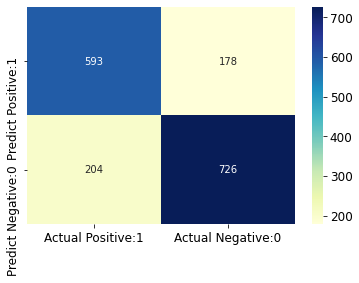

In [116]:
cm_map = pd.DataFrame(data=conf_mat, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_map, annot=True, fmt='d', cmap='YlGnBu')

In [117]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.74      0.77      0.76       771
         2.0       0.80      0.78      0.79       930

    accuracy                           0.78      1701
   macro avg       0.77      0.77      0.77      1701
weighted avg       0.78      0.78      0.78      1701



In [118]:
TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

In [123]:
# Precision 
prec = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(prec))

Precision : 0.7691


In [124]:
# Recall 

recall = TP / float(TP + FN)

print('Recall : {0:0.4f}'.format(recall))

Recall : 0.7440


In [125]:
# F-measure
f_measure = (2*recall*prec)/float(recall+prec)
print('F measure : {0:0.4f}'.format(f_measure))

F measure : 0.7564


In [126]:
# predicting the gender for the prediction set
holly_gender_identification['gender'] = clf.predict(holly_gender_identification.drop(['name'],axis=1))
holly_gender_identification

,name,vowel_ending,unigram_suffix_.,unigram_suffix_0,unigram_suffix_A,unigram_suffix_D,unigram_suffix_E,unigram_suffix_G,unigram_suffix_J,unigram_suffix_L,...,trigram_suffix_z z i,trigram_suffix_z z y,trigram_suffix_É v a,trigram_suffix_å n s,trigram_suffix_è n e,trigram_suffix_é k y,trigram_suffix_í a n,trigram_suffix_ö r g,trigram_suffix_ö t z,gender
51384,Bela,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
51385,Audrey,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
51386,Henry,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
51387,Mia,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
51388,Vern,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57686,Gene,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
57687,August,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
57688,Maria,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
57689,Sofia,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [128]:
#assigning the predicted genders to the original Hollywood dataframe 
for i in hollywood_final['actor1_name'].loc[hollywood_final['actor1_gender'] == 0]:    
    hollywood_final.actor1_gender[hollywood_final.actor1_name == i] = holly_gender_identification.gender[holly_gender_identification.name == i.split(" ")[0]].values[0]
for i in hollywood_final['actor2_name'].loc[hollywood_final['actor2_gender'] == 0]:
    hollywood_final.actor2_gender[hollywood_final.actor2_name == i] = holly_gender_identification.gender[holly_gender_identification.name == i.split(" ")[0]].values[0]
for i in hollywood_final['actor3_name'].loc[hollywood_final['actor3_gender'] == 0]:
    hollywood_final.actor3_gender[hollywood_final.actor3_name == i] = holly_gender_identification.gender[holly_gender_identification.name == i.split(" ")[0]].values[0]
for i in hollywood_final['actor4_name'].loc[hollywood_final['actor4_gender'] == 0]:
    hollywood_final.actor4_gender[hollywood_final.actor4_name == i] = holly_gender_identification.gender[holly_gender_identification.name == i.split(" ")[0]].values[0]
for i in hollywood_final['actor5_name'].loc[hollywood_final['actor5_gender'] == 0]:
    hollywood_final.actor5_gender[hollywood_final.actor5_name == i] = holly_gender_identification.gender[holly_gender_identification.name == i.split(" ")[0]].values[0]
for i in hollywood_final['director_name'].loc[hollywood_final['director_gender'] == 0]:
    hollywood_final.director_gender[hollywood_final.director_name == i] = holly_gender_identification.gender[holly_gender_identification.name == i.split(" ")[0]].values[0]
producer_gender=[]
for i in hollywood_final['producer_name']:
    producer_gender.append(holly_gender_identification.gender[holly_gender_identification.name == i.split(" ")[0]].values[0])
hollywood_final['producer_gender'] = producer_gender
editor_gender = []
for i in hollywood_final['editor_name']:
    editor_gender.append(holly_gender_identification.gender[holly_gender_identification.name == i.split(" ")[0]].values[0])
hollywood_final['editor_gender'] = editor_gender
screeplay_gender = []
for i in hollywood_final['screeplay_name']: 
    screeplay_gender.append(holly_gender_identification.gender[holly_gender_identification.name == i.split(" ")[0]].values[0])
hollywood_final['screeplay_gender'] = screeplay_gender
hollywood_final

<ipython-input-128-3098eaeb432c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hollywood_final.actor1_gender[hollywood_final.actor1_name == i] = holly_gender_identification.gender[holly_gender_identification.name == i.split(" ")[0]].values[0]
<ipython-input-128-3098eaeb432c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hollywood_final.actor2_gender[hollywood_final.actor2_name == i] = holly_gender_identification.gender[holly_gender_identification.name == i.split(" ")[0]].values[0]
<ipython-input-128-3098eaeb432c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

,budget,popularity,revenue,runtime,vote_average,vote_count,actor1_name,actor1_gender,actor2_name,actor2_gender,...,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western,producer_gender,editor_gender,screeplay_gender
2,94000000,9.915573,940335536.0,100.0,7.6,5531.0,Albert Brooks,2,Ellen DeGeneres,1.0,...,0,0,0,0,0,0,0,2.0,2.0,2.0
3,55000000,10.351236,677945399.0,142.0,8.2,7204.0,Tom Hanks,2,Robin Wright,1.0,...,0,0,0,0,0,0,0,1.0,2.0,2.0
4,15000000,8.191009,356296601.0,122.0,7.9,2994.0,Kevin Spacey,2,Annette Bening,1.0,...,0,0,0,0,0,0,0,2.0,2.0,2.0
5,839727,3.82689,23217674.0,119.0,7.9,1110.0,Orson Welles,2,Joseph Cotten,2.0,...,1,0,0,0,0,0,0,2.0,2.0,2.0
7,140000000,28.769026,655011224.0,143.0,7.4,6368.0,Johnny Depp,2,Geoffrey Rush,2.0,...,0,0,0,0,0,0,0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41134,45000000,2.704161,114501299.0,105.0,5.4,479.0,Jason Bateman,2,Olivia Munn,1.0,...,0,0,0,0,0,0,0,2.0,2.0,1.0
42000,24000000,3.768481,64414761.0,139.0,6.6,634.0,Denzel Washington,2,Viola Davis,1.0,...,0,0,0,0,0,0,0,2.0,2.0,2.0
42327,5000000,7.222601,10025571.0,98.0,6.7,400.0,Zoey Deutch,1,Halston Sage,1.0,...,0,0,0,0,0,0,0,2.0,2.0,1.0
42441,10500000,1.782013,5535981.0,91.0,6.4,42.0,Colin Farrell,2,Nicole Kidman,1.0,...,0,0,0,0,0,0,0,1.0,1.0,1.0


### Checking if genders are missing for any names

In [129]:
hollywood_final['actor1_name'].loc[hollywood_final['actor1_gender']==0]

Series([], Name: actor1_name, dtype: object)

In [130]:
hollywood_final['actor2_name'].loc[hollywood_final['actor2_gender']==0]

Series([], Name: actor2_name, dtype: object)

In [131]:
hollywood_final['actor3_name'].loc[hollywood_final['actor3_gender']==0]

Series([], Name: actor3_name, dtype: object)

In [132]:
hollywood_final['actor4_name'].loc[hollywood_final['actor4_gender']==0]

Series([], Name: actor4_name, dtype: object)

In [133]:
hollywood_final['actor5_name'].loc[hollywood_final['actor5_gender']==0]

Series([], Name: actor5_name, dtype: object)

In [134]:
hollywood_final['director_name'].loc[hollywood_final['director_gender']==0]

Series([], Name: director_name, dtype: object)

In [135]:
hollywood_final[['producer_name','producer_gender']]

,producer_name,producer_gender
2,Graham Walters,2.0
3,Wendy Finerman,1.0
4,Bruce Cohen,2.0
5,Orson Welles,2.0
7,Jerry Bruckheimer,2.0
...,...,...
41134,Scott Stuber,2.0
42000,Scott Rudin,2.0
42327,Matthew Kaplan,2.0
42441,Youree Henley,1.0


In [136]:
hollywood_final[['editor_name','editor_gender']]

,editor_name,editor_gender
2,David Ian Salter,2.0
3,Arthur Schmidt,2.0
4,Christopher Greenbury,2.0
5,Robert Wise,2.0
7,Stephen E. Rivkin,2.0
...,...,...
41134,Jeff Groth,2.0
42000,Hughes Winborne,2.0
42327,Joe Landauer,2.0
42441,Sarah Flack,1.0


In [137]:
hollywood_final[['screeplay_name','screeplay_gender']]

,screeplay_name,screeplay_gender
2,Andrew Stanton,2.0
3,Eric Roth,2.0
4,Alan Ball,2.0
5,Orson Welles,2.0
7,Ted Elliott,2.0
...,...,...
41134,Gene Stupnitsky,1.0
42000,August Wilson,2.0
42327,Maria Maggenti,1.0
42441,Sofia Coppola,1.0


In [138]:
hollywood_final.isnull().sum()

budget                   0
popularity               0
revenue                  0
runtime                  0
vote_average             0
vote_count               0
actor1_name              0
actor1_gender            0
actor2_name              0
actor2_gender            0
actor3_name              0
actor3_gender            0
actor4_name              0
actor4_gender            0
actor5_name              0
actor5_gender            0
director_name            0
director_gender          0
producer_name            0
screeplay_name           0
editor_name              0
year                     0
Genre_Action             0
Genre_Adventure          0
Genre_Animation          0
Genre_Comedy             0
Genre_Crime              0
Genre_Documentary        0
Genre_Drama              0
Genre_Family             0
Genre_Fantasy            0
Genre_Foreign            0
Genre_History            0
Genre_Horror             0
Genre_Music              0
Genre_Mystery            0
Genre_Romance            0
G

### Exporting the cleaned and final Hollywood dataset

In [139]:
hollywood_final = hollywood_final[['budget', 'popularity', 'revenue','year', 'runtime', 'vote_average', 'vote_count', \
                  'actor1_gender', 'actor2_gender', 'actor3_gender', 'actor4_gender', 'actor5_gender', 'director_gender', \
                  'producer_gender','screeplay_gender', 'editor_gender', 'Genre_Action', \
                  'Genre_Adventure', 'Genre_Animation', 'Genre_Comedy', 'Genre_Crime', 'Genre_Documentary','Genre_Drama', \
                  'Genre_Family', 'Genre_Fantasy', 'Genre_Foreign','Genre_History', 'Genre_Horror', 'Genre_Music', \
                  'Genre_Mystery','Genre_Romance', 'Genre_Science Fiction', 'Genre_Thriller', 'Genre_War',]]
hollywood_final

,budget,popularity,revenue,year,runtime,vote_average,vote_count,actor1_gender,actor2_gender,actor3_gender,...,Genre_Fantasy,Genre_Foreign,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War
2,94000000,9.915573,940335536.0,2003,100.0,7.6,5531.0,2,1.0,2,...,0,0,0,0,0,0,0,0,0,0
3,55000000,10.351236,677945399.0,1994,142.0,8.2,7204.0,2,1.0,2,...,0,0,0,0,0,0,0,0,0,0
4,15000000,8.191009,356296601.0,1999,122.0,7.9,2994.0,2,1.0,1,...,0,0,0,0,0,0,0,0,0,0
5,839727,3.82689,23217674.0,1941,119.0,7.9,1110.0,2,2.0,1,...,0,0,0,0,0,1,0,0,0,0
7,140000000,28.769026,655011224.0,2003,143.0,7.4,6368.0,2,2.0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41134,45000000,2.704161,114501299.0,2016,105.0,5.4,479.0,2,1.0,2,...,0,0,0,0,0,0,0,0,0,0
42000,24000000,3.768481,64414761.0,2016,139.0,6.6,634.0,2,1.0,2,...,0,0,0,0,0,0,0,0,0,0
42327,5000000,7.222601,10025571.0,2017,98.0,6.7,400.0,1,1.0,2,...,0,0,0,0,0,0,0,0,0,0
42441,10500000,1.782013,5535981.0,2017,91.0,6.4,42.0,2,1.0,1,...,0,0,0,0,0,0,0,0,0,0


In [140]:
hollywood_final.to_csv('hollywood_final.csv', index=False)

# Gender prediction for Bollywood dataset using SVM classifier

In [141]:
# separating the prediction set from the combined dataframe
bolly_gender_identification = indian_names.tail(b_length)
bolly_gender_identification = bolly_gender_identification.drop(['gender'],axis=1)
bolly_gender_identification

,name,vowel_ending,unigram_suffix_.,unigram_suffix_A,unigram_suffix_N,unigram_suffix_P,unigram_suffix_a,unigram_suffix_b,unigram_suffix_c,unigram_suffix_d,...,trigram_suffix_z i z,trigram_suffix_z m a,trigram_suffix_z n a,trigram_suffix_z n i,trigram_suffix_z o o,trigram_suffix_z o u,trigram_suffix_z u n,trigram_suffix_z w a,trigram_suffix_z y a,trigram_suffix_z z a
54978,Rani,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54979,Abhishek,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54980,Abhishek,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54981,Anupam,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54982,Rani,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55484,Vijay,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55485,A.R.,False,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55486,Girish,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55487,Gauri,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
# separating the test set from the combined dataframe
bolly_genders = indian_names.iloc[indian_names_length:indian_names_length+bolly_genders_length, :]
bolly_genders = bolly_genders.drop(['name'],axis=1)
bolly_genders

,gender,vowel_ending,unigram_suffix_.,unigram_suffix_A,unigram_suffix_N,unigram_suffix_P,unigram_suffix_a,unigram_suffix_b,unigram_suffix_c,unigram_suffix_d,...,trigram_suffix_z i z,trigram_suffix_z m a,trigram_suffix_z n a,trigram_suffix_z n i,trigram_suffix_z o o,trigram_suffix_z o u,trigram_suffix_z u n,trigram_suffix_z w a,trigram_suffix_z y a,trigram_suffix_z z a
54792,2.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54793,1.0,True,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54794,2.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54795,2.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54796,2.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54973,2.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54974,2.0,True,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54975,1.0,False,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54976,2.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
# separating the training set from the combined dataframe
indian_names = indian_names.iloc[:indian_names_length, :]
indian_names = indian_names.drop(['name'],axis=1)
indian_names

,gender,vowel_ending,unigram_suffix_.,unigram_suffix_A,unigram_suffix_N,unigram_suffix_P,unigram_suffix_a,unigram_suffix_b,unigram_suffix_c,unigram_suffix_d,...,trigram_suffix_z i z,trigram_suffix_z m a,trigram_suffix_z n a,trigram_suffix_z n i,trigram_suffix_z o o,trigram_suffix_z o u,trigram_suffix_z u n,trigram_suffix_z w a,trigram_suffix_z y a,trigram_suffix_z z a
0,2.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54787,1.0,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54788,1.0,True,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54789,1.0,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54790,1.0,True,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
# input features
X_train = indian_names.drop(['gender'],axis=1)
X_train

,vowel_ending,unigram_suffix_.,unigram_suffix_A,unigram_suffix_N,unigram_suffix_P,unigram_suffix_a,unigram_suffix_b,unigram_suffix_c,unigram_suffix_d,unigram_suffix_e,...,trigram_suffix_z i z,trigram_suffix_z m a,trigram_suffix_z n a,trigram_suffix_z n i,trigram_suffix_z o o,trigram_suffix_z o u,trigram_suffix_z u n,trigram_suffix_z w a,trigram_suffix_z y a,trigram_suffix_z z a
0,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54787,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54788,True,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54789,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54790,True,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
# target feature
Y_train = indian_names['gender']
Y_train

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
54787    1.0
54788    1.0
54789    1.0
54790    1.0
54791    1.0
Name: gender, Length: 54792, dtype: float64

In [146]:
# input features
X_test = bolly_genders.drop(['gender'],axis=1)
X_test

,vowel_ending,unigram_suffix_.,unigram_suffix_A,unigram_suffix_N,unigram_suffix_P,unigram_suffix_a,unigram_suffix_b,unigram_suffix_c,unigram_suffix_d,unigram_suffix_e,...,trigram_suffix_z i z,trigram_suffix_z m a,trigram_suffix_z n a,trigram_suffix_z n i,trigram_suffix_z o o,trigram_suffix_z o u,trigram_suffix_z u n,trigram_suffix_z w a,trigram_suffix_z y a,trigram_suffix_z z a
54792,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54793,True,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54794,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54795,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54796,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54973,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54974,True,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54975,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54976,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
# target feature
Y_test = bolly_genders['gender']
Y_test

54792    2.0
54793    1.0
54794    2.0
54795    2.0
54796    2.0
        ... 
54973    2.0
54974    2.0
54975    1.0
54976    2.0
54977    2.0
Name: gender, Length: 186, dtype: float64

In [148]:
X_train.shape,X_test.shape

((54792, 2571), (186, 2571))

In [149]:
# SVM classifier model with linear kernel
clf1 = svm.SVC(kernel='linear') 
clf1.fit(X_train, Y_train)
Y_pred = clf1.predict(X_test)
Y_pred

array([1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 1., 1., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2.,
       2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1.,
       2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1.,
       2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 2.,
       1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2.,
       1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1.,
       2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2.])

In [150]:
# Accuracy
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score: 0.8925


In [151]:
# Confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred)

print('Confusion matrix\n\n', conf_mat)

print('\nTrue Positives(TP) = ', conf_mat[0,0])

print('\nTrue Negatives(TN) = ', conf_mat[1,1])

print('\nFalse Positives(FP) = ', conf_mat[0,1])

print('\nFalse Negatives(FN) = ', conf_mat[1,0])

Confusion matrix

 [[ 61   8]
 [ 12 105]]

True Positives(TP) =  61

True Negatives(TN) =  105

False Positives(FP) =  8

False Negatives(FN) =  12


###### The confusion matrix shows 18 + 38 = 56 correct predictions and 1 + 60 = 61 incorrect predictions.

<AxesSubplot:>

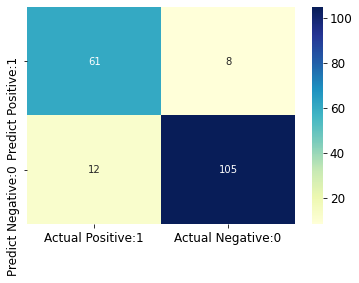

In [152]:
cm_map = pd.DataFrame(data=conf_mat, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_map, annot=True, fmt='d', cmap='YlGnBu')

In [153]:
# Classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         1.0       0.84      0.88      0.86        69
         2.0       0.93      0.90      0.91       117

    accuracy                           0.89       186
   macro avg       0.88      0.89      0.89       186
weighted avg       0.89      0.89      0.89       186



In [154]:
TP = conf_mat[0,0]
TN = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]

In [159]:
# Precision
prec = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(prec))

Precision : 0.8841


In [160]:
# Recall
recall = TP / float(TP + FN)

print('Recall : {0:0.4f}'.format(recall))

Recall : 0.8356


In [161]:
# F-measure
f_measure = (2*recall*prec)/float(recall+prec)
print('F measure : {0:0.4f}'.format(f_measure))

F measure : 0.8592


In [162]:
# predicting the gender for the prediction set
bolly_gender_identification['gender'] = clf1.predict(bolly_gender_identification.drop(['name'],axis=1))
bolly_gender_identification

,name,vowel_ending,unigram_suffix_.,unigram_suffix_A,unigram_suffix_N,unigram_suffix_P,unigram_suffix_a,unigram_suffix_b,unigram_suffix_c,unigram_suffix_d,...,trigram_suffix_z m a,trigram_suffix_z n a,trigram_suffix_z n i,trigram_suffix_z o o,trigram_suffix_z o u,trigram_suffix_z u n,trigram_suffix_z w a,trigram_suffix_z y a,trigram_suffix_z z a,gender
54978,Rani,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
54979,Abhishek,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
54980,Abhishek,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
54981,Anupam,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
54982,Rani,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55484,Vijay,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
55485,A.R.,False,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
55486,Girish,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
55487,Gauri,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [163]:
#assigning the predicted genders to the original Bollywood dataset
for i in bollywood_final['actor1_name'].loc[bollywood_final['actor1_gender'] == 0]:
    bollywood_final.actor1_gender[bollywood_final.actor1_name == i] = \
    bolly_gender_identification.gender[bolly_gender_identification.name == i.split(" ")[0]].values[0]
for i in bollywood_final['actor2_name'].loc[bollywood_final['actor2_gender'] == 0]:
    bollywood_final.actor2_gender[bollywood_final.actor2_name == i] = \
    bolly_gender_identification.gender[bolly_gender_identification.name == i.split(" ")[0]].values[0]
for i in bollywood_final['actor3_name'].loc[bollywood_final['actor3_gender'] == 0]:
    bollywood_final.actor3_gender[bollywood_final.actor3_name == i] = \
    bolly_gender_identification.gender[bolly_gender_identification.name == i.split(" ")[0]].values[0]
for i in bollywood_final['actor4_name'].loc[bollywood_final['actor4_gender'] == 0]:
    bollywood_final.actor4_gender[bollywood_final.actor4_name == i] = \
    bolly_gender_identification.gender[bolly_gender_identification.name == i.split(" ")[0]].values[0]
for i in bollywood_final['actor5_name'].loc[bollywood_final['actor5_gender'] == 0]:
    bollywood_final.actor5_gender[bollywood_final.actor5_name == i] = \
    bolly_gender_identification.gender[bolly_gender_identification.name == i.split(" ")[0]].values[0]
for i in bollywood_final['director_name'].loc[bollywood_final['director_gender'] == 0]:
    bollywood_final.director_gender[bollywood_final.director_name == i] = \
    bolly_gender_identification.gender[bolly_gender_identification.name == i.split(" ")[0]].values[0]
producer_gender=[]
for i in bollywood_final['producer_name']:
    producer_gender.append(bolly_gender_identification.gender[bolly_gender_identification.name == i.split(" ")[0]].values[0])
bollywood_final['producer_gender'] = producer_gender
editor_gender = []
for i in bollywood_final['editor_name']:
    editor_gender.append(bolly_gender_identification.gender[bolly_gender_identification.name == i.split(" ")[0]].values[0])
bollywood_final['editor_gender'] = editor_gender
screeplay_gender = []
for i in bollywood_final['screeplay_name']: 
    screeplay_gender.append(bolly_gender_identification.gender[bolly_gender_identification.name == i.split(" ")[0]].values[0])
bollywood_final['screeplay_gender'] = screeplay_gender
bollywood_final

<ipython-input-163-6ac0a4974bf1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bollywood_final.actor1_gender[bollywood_final.actor1_name == i] = \
<ipython-input-163-6ac0a4974bf1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bollywood_final.actor2_gender[bollywood_final.actor2_name == i] = \
<ipython-input-163-6ac0a4974bf1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bollywood_final.actor3_gender[bollywood_final.actor3_name

,budget,popularity,revenue,runtime,vote_average,vote_count,actor1_name,actor1_gender,actor2_name,actor2_gender,...,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,producer_gender,editor_gender,screeplay_gender
2,7000000,0.300848,29385320.0,192.0,7.4,60.0,Shah Rukh Khan,2,Preity Zinta,1.0,...,0,0,0,0,0,0,0,2.0,2.0,2.0
3,1101652,0.021427,5525109.0,142.0,6.0,20.0,Rani Mukerji,1,Saif Ali Khan,2.0,...,0,0,0,0,0,0,0,2.0,2.0,1.0
4,3947601,0.833918,13200241.0,186.0,7.2,97.0,Shah Rukh Khan,2,Preity Zinta,1.0,...,0,0,0,0,0,0,0,2.0,2.0,2.0
5,1710627,1.459324,19000000.0,155.0,6.0,23.0,Shah Rukh Khan,2,Kareena Kapoor,1.0,...,0,0,0,0,0,0,0,1.0,2.0,2.0
6,2073698,0.361776,6661755.0,188.0,6.4,23.0,Aishwarya Rai Bachchan,1,Salman Khan,2.0,...,0,0,0,0,0,0,0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,5200000,0.240306,27370034.0,139.0,8.1,18.0,Hrithik Roshan,2,Yami Gautam,1.0,...,0,0,0,0,0,0,0,2.0,2.0,2.0
557,473712,0.545032,1982090.0,138.0,5.7,15.0,Sonakshi Sinha,1,Konkona Sen Sharma,1.0,...,0,0,0,0,0,0,0,2.0,2.0,2.0
558,4868708,0.312055,13685017.0,146.0,5.8,10.0,Sridevi Kapoor,1,Sajal Ali,1.0,...,0,0,0,0,0,0,0,1.0,1.0,2.0
577,4300000,0.646615,3376375.0,149.0,7.0,38.0,Alia Bhatt,1,Shah Rukh Khan,2.0,...,0,0,0,0,0,0,0,2.0,1.0,1.0


### Checking if genders are missing for any names

In [164]:
print(bollywood_final['actor1_name'].loc[bollywood_final['actor1_gender']==0])

Series([], Name: actor1_name, dtype: object)


In [165]:
print(bollywood_final['actor2_name'].loc[bollywood_final['actor2_gender']==0])

Series([], Name: actor2_name, dtype: object)


In [166]:
print(bollywood_final['actor3_name'].loc[bollywood_final['actor3_gender']==0])

Series([], Name: actor3_name, dtype: object)


In [167]:
print(bollywood_final['actor4_name'].loc[bollywood_final['actor4_gender']==0])

Series([], Name: actor4_name, dtype: object)


In [168]:
print(bollywood_final['actor5_name'].loc[bollywood_final['actor5_gender']==0])

Series([], Name: actor5_name, dtype: object)


In [169]:
print(bollywood_final['director_name'].loc[bollywood_final['director_gender']==0])

Series([], Name: director_name, dtype: object)


In [170]:
bollywood_final[['producer_name','producer_gender']]

,producer_name,producer_gender
2,Yash Chopra,2.0
3,Yash Chopra,2.0
4,Karan Johar,2.0
5,Juhi Chawla,1.0
6,Sanjay Leela Bhansali,2.0
...,...,...
556,Rakesh Roshan,2.0
557,A.R. Murugadoss,2.0
558,Boney Kapoor,1.0
577,Karan Johar,2.0


In [171]:
bollywood_final[['editor_name','editor_gender']]

,editor_name,editor_gender
2,Ritesh Soni,2.0
3,Ritesh Soni,2.0
4,Sanjay Sankla,2.0
5,A. Sreekar Prasad,2.0
6,Bela Segal,1.0
...,...,...
556,Akiv Ali,2.0
557,A. Sreekar Prasad,2.0
558,Monisha A Baldwa,1.0
577,Hemanti Sarkar,1.0


In [172]:
bollywood_final[['screeplay_name','screeplay_gender']]

,screeplay_name,screeplay_gender
2,Aditya Chopra,2.0
3,Kunal Kohli,1.0
4,Karan Johar,2.0
5,Saket Chaudhary,2.0
6,Sanjay Leela Bhansali,2.0
...,...,...
556,Vijay Kumar Mishra,2.0
557,A.R. Murugadoss,2.0
558,Girish Kohli,2.0
577,Gauri Shinde,1.0


In [173]:
bollywood_final.isnull().sum()

budget                   0
popularity               0
revenue                  0
runtime                  0
vote_average             0
vote_count               0
actor1_name              0
actor1_gender            0
actor2_name              0
actor2_gender            0
actor3_name              0
actor3_gender            0
actor4_name              0
actor4_gender            0
actor5_name              0
actor5_gender            0
director_name            0
director_gender          0
producer_name            0
screeplay_name           0
editor_name              0
year                     0
Genre_Action             0
Genre_Adventure          0
Genre_Animation          0
Genre_Comedy             0
Genre_Crime              0
Genre_Documentary        0
Genre_Drama              0
Genre_Family             0
Genre_Fantasy            0
Genre_Foreign            0
Genre_History            0
Genre_Horror             0
Genre_Music              0
Genre_Mystery            0
Genre_Romance            0
G

In [174]:
hollywood_final.columns

Index(['budget', 'popularity', 'revenue', 'year', 'runtime', 'vote_average',
       'vote_count', 'actor1_gender', 'actor2_gender', 'actor3_gender',
       'actor4_gender', 'actor5_gender', 'director_gender', 'producer_gender',
       'screeplay_gender', 'editor_gender', 'Genre_Action', 'Genre_Adventure',
       'Genre_Animation', 'Genre_Comedy', 'Genre_Crime', 'Genre_Documentary',
       'Genre_Drama', 'Genre_Family', 'Genre_Fantasy', 'Genre_Foreign',
       'Genre_History', 'Genre_Horror', 'Genre_Music', 'Genre_Mystery',
       'Genre_Romance', 'Genre_Science Fiction', 'Genre_Thriller',
       'Genre_War'],
      dtype='object')

### Exporting the cleaned and final Bollywood dataset

In [175]:
bollywood_final = bollywood_final[['budget', 'popularity', 'revenue','year', 'runtime', 'vote_average', 'vote_count', \
                  'actor1_gender', 'actor2_gender', 'actor3_gender', 'actor4_gender', 'actor5_gender', 'director_gender', \
                  'producer_gender','screeplay_gender', 'editor_gender', 'Genre_Action', \
                  'Genre_Adventure', 'Genre_Animation', 'Genre_Comedy', 'Genre_Crime', 'Genre_Documentary','Genre_Drama', \
                  'Genre_Family', 'Genre_Fantasy', 'Genre_Foreign','Genre_History', 'Genre_Horror', 'Genre_Music', \
                  'Genre_Mystery','Genre_Romance', 'Genre_Science Fiction', 'Genre_Thriller', 'Genre_War',]]
bollywood_final

,budget,popularity,revenue,year,runtime,vote_average,vote_count,actor1_gender,actor2_gender,actor3_gender,...,Genre_Fantasy,Genre_Foreign,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War
2,7000000,0.300848,29385320.0,2004,192.0,7.4,60.0,2,1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1101652,0.021427,5525109.0,2004,142.0,6.0,20.0,1,2.0,1,...,0,0,0,0,0,0,0,0,0,0
4,3947601,0.833918,13200241.0,2003,186.0,7.2,97.0,2,1.0,2,...,0,0,0,0,0,0,0,0,0,0
5,1710627,1.459324,19000000.0,2001,155.0,6.0,23.0,2,1.0,2,...,0,0,0,0,0,0,0,0,0,0
6,2073698,0.361776,6661755.0,1999,188.0,6.4,23.0,1,2.0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,5200000,0.240306,27370034.0,2017,139.0,8.1,18.0,2,1.0,2,...,0,0,0,0,0,0,0,0,0,0
557,473712,0.545032,1982090.0,2016,138.0,5.7,15.0,1,1.0,1,...,0,0,0,0,0,0,0,0,0,0
558,4868708,0.312055,13685017.0,2017,146.0,5.8,10.0,1,1.0,2,...,0,0,0,0,0,0,0,0,0,0
577,4300000,0.646615,3376375.0,2016,149.0,7.0,38.0,1,2.0,2,...,0,0,0,0,0,0,0,0,0,0


In [176]:
bollywood_final.to_csv('bollywood_final.csv', index=False)